Get the data and set up the connection from the data base in SQL 

In [3]:
import toml
import os
import pandas as pd 
from sqlalchemy import create_engine

secrets_path = os.path.join("..", "..", ".streamlit", "secrets.toml")
secrets = toml.load(secrets_path)
db_token = secrets["connections"]["databricks"]["access_token"]
server_hostname = secrets["connections"]["databricks"]["server_hostname"]
http_path = secrets["connections"]["databricks"]["http_path"]
catalog_name = "hive_metastore" 
schema_name = "default"

connection_url = (
    f"databricks://token:{db_token}@{server_hostname}?"
    f"http_path={http_path}&catalog={catalog_name}&schema={schema_name}"
)

# 3. Create the engine
engine = create_engine(connection_url)

# 4. Pull your data into a Pandas DataFrame
# Replace 'your_table_name' with the actual name of your Xbox dataset
query = "SELECT * FROM xbox_analysis_data"
final_df = pd.read_sql(query, engine)

print(f"Success! Loaded {len(final_df)} rows.")


[WARN] Parameter '_user_agent_entry' is deprecated; use 'user_agent_entry' instead. This parameter will be removed in the upcoming releases.


Success! Loaded 1102 rows.


In [20]:
import matplotlib.pyplot as plt 
import seaborn as sns
import numpy as np 
import pandas as pd 
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
final_df.head(10)


,Game,url,ProductID,System,xCloud,Status,Release,Metacritic,Series_X_S,ESRB_x,ESRB_Content_Descriptors,asset_count,developer,has_gamepass_remediation,publisher,release_date,rating_30_days.AggregateTimeSpan,rating_30_days_avg,rating_30_days.PlayCount,rating_30_days.PurchaseCount,rating_30_days_count,rating_30_days.RentalCount,rating_30_days.TrialCount,rating_7_days.AggregateTimeSpan,rating_7_days_avg,rating_7_days.PlayCount,rating_7_days.PurchaseCount,rating_7_days_count,rating_7_days.RentalCount,rating_7_days.TrialCount,rating_alltime.AggregateTimeSpan,rating_alltime_avg,rating_alltime.PlayCount,rating_alltime.PurchaseCount,rating_alltime_count,rating_alltime.RentalCount,rating_alltime.TrialCount,current_price,days_since_release,days_since_gp_add,momentum,discovery_capture,quality_retention,rating_trend_7d_vs_alltime,is_day_one_gp,Genre,genre_median_momentum,lift_vs_genre_momentum,conditioned_median_momentum,genre_median_discovery_capture,lift_vs_genre_discovery_capture,conditioned_median_discovery_capture,genre_median_quality_retention,lift_vs_genre_quality_retention,conditioned_median_quality_retention,party_type
0,Routine,https://www.xbox.com/en-us/games/store/routine...,9PCJT6TLCGGV,Xbox,Yes,Active,Dec 2025,NaN,No relation,T,"Vio, Blo, ParNud",26,lunar software,True,raw fury,2025-12-04T15:00:00.0000000Z,30Days,4.2,0.0,0,1339,0,0,7Days,4.2,0.0,0,155,0,0,AllTime,4.0,0.0,0,2102,0,0,24.99,54,54,11.58,7.37,0.2,0.2,True,Action & adventure,5.790,5.790,11.580,0.055,7.315,1.330,-0.35,0.55,-0.20,3rd Party
1,Lara Croft and the Temple of Osiris,https://www.xbox.com/en-us/games/store/Lara-Cr...,C3553MB4P5TT,Xbox / PC,Yes,Active,Dec 2014,74,No relation,T,"MilBlo, MilLan, Vio",15,crystal dynamics,True,crystal dynamics,2014-12-09T00:00:00.0000000Z,30Days,3.8,0.0,0,16,0,0,7Days,3.8,0.0,0,4,0,0,AllTime,3.8,0.0,0,2907,0,0,19.99,4072,84,25.00,0.14,0.0,0.0,False,Action-Adventure,18.575,6.425,0.000,0.055,0.085,0.000,0.00,0.00,0.00,3rd Party
2,Whiskerwood,https://www.xbox.com/en-us/games/store/whisker...,9NM2T0DMP4XV,PC,NaN,Active,Nov 2025,NaN,No relation,E10,FanVio,17,minakata dynamics,True,hooded horse,2025-11-06T14:00:00.0000000Z,30Days,4.1,0.0,0,17,0,0,7Days,5.0,0.0,0,1,0,0,AllTime,3.5,0.0,0,195,0,0,29.99,84,84,5.88,0.51,0.6,1.5,True,Strategy,0.000,5.880,2.940,0.000,0.510,0.005,-0.50,1.10,0.20,3rd Party
3,Super Fantasy Kingdom (Game Preview),https://www.xbox.com/en-us/games/store/super-f...,9MZ8B96NDG1T,PC,NaN,Active,Oct 2025,NaN,No relation,E10,"FanVio, MilBlo, UseAlc",17,super fantasy games,True,hooded horse,2025-10-24T13:00:00.0000000Z,30Days,4.0,0.0,0,8,0,0,7Days,1.0,0.0,0,1,0,0,AllTime,3.7,0.0,0,217,0,0,19.99,115,115,12.50,0.46,0.3,-2.7,True,Defense,12.500,0.000,12.500,0.460,0.000,0.460,0.30,0.00,0.30,3rd Party
4,Evil West,https://www.xbox.com/en-us/games/store/Evil-We...,9MW581HCJPM6,Xbox / PC,Yes,Active,Nov 2022,73,No relation,M,"Blood and Gore, Intense Violence, Strong Language",19,flying wild hog,True,focus entertainment,2022-11-22T05:00:00.0000000Z,30Days,3.9,0.0,0,78,0,0,7Days,4.0,0.0,0,18,0,0,AllTime,3.9,0.0,0,5942,0,0,59.99,1180,115,23.08,0.30,0.0,0.1,False,Shooter,20.375,2.705,20.000,0.060,0.240,0.060,0.15,-0.15,0.20,3rd Party
5,Moonsweeper,https://www.xbox.com/en-us/games/store/Microso...,9WZDNCRFHWCN,Xbox / PC,Yes,Active,Jan 1983,NaN,No relation,E,MilFanVio,20,xbox game studios,False,xbox game studios,2012-07-27T22:26:23.4565523Z,30Days,3.6,0.0,0,130,0,0,7Days,3.0,0.0,0,32,0,0,AllTime,4.3,0.0,0,110216,0,0,0.00,15729,115,24.62,0.03,-0.7,-1.3,False,Puzzle & trivia,24.620,0.000,24.620,0.030,0.000,0.030,-0.70,0.00,-0.70,2nd Party
6,Pax Dei,https://www.xbox.com/en-us/games/store/pax-dei...,9PHGK0538TXM,PC,NaN,Active,Oct 2025,NaN,No relation,M,"Vio, Blo",23,mainframe industries,True,mainframe industries,2025-10-16T15:00:00.0000000Z,30Days,2.6,0.0,0,27,0,0,7Days,2.7,0.0,0,3,0,0,AllTime,2.0,0.0,0,482,0,0,29.99,115,115,11.11,0.62,0.6,0.7,True,RPG,11.110,0.000,27.725,0.020,0.600,0.135,-0.20,0.80,-0.05,3rd Party
7,Baldur's Gate and Bald

In [1]:
import pandas as pd 
final_df_csv = pd.read_csv("db_data.csv")

In [2]:
columns_drop  = ['is_xpa', 'prices', 'Genre_x', 'Community_Notes', 'lift_vs_rating_momentum','lift_vs_rating_momentum','lift_vs_rating_discovery_capture',
'zscore_discovery_capture', 'lift_vs_rating_quality_retention','zscore_quality_retention', 'zscore_momentum','Removed', 'Metacritic']
final_df = final_df_csv.drop(columns= columns_drop)

In [3]:
final_df['xCloud'] = final_df['xCloud'].fillna('Not Supported')
final_df['developer'] = final_df['developer'].fillna(final_df['publisher'])
final_df.head(10)




,Game,url,ProductID,System,xCloud,Status,Release,Series_X_S,ESRB_x,ESRB_Content_Descriptors,...,genre_median_momentum,lift_vs_genre_momentum,conditioned_median_momentum,genre_median_discovery_capture,lift_vs_genre_discovery_capture,conditioned_median_discovery_capture,genre_median_quality_retention,lift_vs_genre_quality_retention,conditioned_median_quality_retention,party_type
0,Routine,https://www.xbox.com/en-us/games/store/routine...,9PCJT6TLCGGV,Xbox,Yes,Active,Dec 2025,No relation,T,"Vio, Blo, ParNud",...,5.790,5.790,11.580,0.055,7.315,1.330,-0.35,0.55,-0.20,3rd Party
1,Lara Croft and the Temple of Osiris,https://www.xbox.com/en-us/games/store/Lara-Cr...,C3553MB4P5TT,Xbox / PC,Yes,Active,Dec 2014,No relation,T,"MilBlo, MilLan, Vio",...,18.575,6.425,0.000,0.055,0.085,0.000,0.00,0.00,0.00,3rd Party
2,Whiskerwood,https://www.xbox.com/en-us/games/store/whisker...,9NM2T0DMP4XV,PC,Not Supported,Active,Nov 2025,No relation,E10,FanVio,...,0.000,5.880,2.940,0.000,0.510,0.005,-0.50,1.10,0.20,3rd Party
3,Super Fantasy Kingdom (Game Preview),https://www.xbox.com/en-us/games/store/super-f...,9MZ8B96NDG1T,PC,Not Supported,Active,Oct 2025,No relation,E10,"FanVio, MilBlo, UseAlc",...,12.500,0.000,12.500,0.460,0.000,0.460,0.30,0.00,0.30,3rd Party
4,Evil West,https://www.xbox.com/en-us/games/store/Evil-We...,9MW581HCJPM6,Xbox / PC,Yes,Active,Nov 2022,No relation,M,"Blood and Gore, Intense Violence, Strong Language",...,20.375,2.705,20.000,0.060,0.240,0.060,0.15,-0.15,0.20,3rd Party
5,Moonsweeper,https://www.xbox.com/en-us/games/store/Microso...,9WZDNCRFHWCN,Xbox / PC,Yes,Active,Jan 1983,No relation,E,MilFanVio,...,24.620,0.000,24.620,0.030,0.000,0.030,-0.70,0.00,-0.70,2nd Party
6,Pax Dei,https://www.xbox.com/en-us/games/store/pax-dei...,9PHGK0538TXM,PC,Not Supported,Active,Oct 2025,No relation,M,"Vio, Blo",...,11.110,0.000,27.725,0.020,0.600,0.135,-0.20,0.80,-0.05,3rd Party
7,Baldur's Gate and Baldur's Gate II: Enhanced E...,https://www.xbox.com/en-us/games/store/Baldurs...,9NCNBWZSHZR5,PC,Not Supported,Active,Oct 2019,No relation,T,"BloGor, UseTob, SugThe, AlcRef, MilLan, ParNud...",...,11.110,-11.110,0.000,0.020,-0.020,0.000,-0.20,-0.40,-0.25,3rd Party
8,Sopa: Tale of the Stolen Potato,https://www.xbox.com/en-us/games/store/sopa-ta...,9N221ZTFGQB0,Xbox / PC,Yes,Active,Oct 2025,No relation,E,NaN,...,18.575,2.115,27.330,0.055,1.275,0.350,0.00,0.00,0.30,3rd Party
9,Hogwarts Legacy,https://www.xbox.com/en-us/games/store/hogwart...,9MT5NJ5W7B8Z,Xbox / PC,Yes,Active,Feb 2023,No relation,T,"UseAlc, FanVio, Blo, MilLan",...,18.575,4.135,0.000,0.055,0.385,0.000,0.00,-0.30,0.00,3rd Party


In [5]:
final_df['publisher'] = final_df['publisher'].fillna('electronic arts')
final_df['developer'] = final_df['developer'].fillna('electronic arts')

In [6]:
print(final_df.isna().sum())


Game                                      0
url                                       0
ProductID                                 0
System                                    0
xCloud                                    0
Status                                    0
Release                                   0
Series_X_S                                0
ESRB_x                                    0
ESRB_Content_Descriptors                138
asset_count                               0
developer                                 0
has_gamepass_remediation                  0
publisher                                 0
release_date                              0
rating_30_days.AggregateTimeSpan          0
rating_30_days_avg                        0
rating_30_days.PlayCount                  0
rating_30_days.PurchaseCount              0
rating_30_days_count                      0
rating_30_days.RentalCount                0
rating_30_days.TrialCount                 0
rating_7_days.AggregateTimeSpan 

In [19]:
final_df.dtypes 

Game                                     object
url                                      object
ProductID                                object
System                                   object
xCloud                                   object
Status                                   object
Release                                  object
Metacritic                               object
Series_X_S                               object
ESRB_x                                   object
ESRB_Content_Descriptors                 object
asset_count                               int64
developer                                object
has_gamepass_remediation                   bool
publisher                                object
release_date                             object
rating_30_days.AggregateTimeSpan         object
rating_30_days_avg                      float64
rating_30_days.PlayCount                float64
rating_30_days.PurchaseCount              int64
rating_30_days_count                    

I am noticing now that a lot of these ESRB_content descriptors actually missing from the raw API Data so I would actually need to fix that before going further. 

My intiail hypotheses with this then is that since a lot of the games do have E as their ratings that then E is a rating with no content descriptors but that it was also able ot not include some of the content descriptors because some of these games have a value of M which would mean a lot of warnings on the content descriptors.

In [4]:
# Identify games where Descriptors are NaN AND Rating is NOT 'E' or 'RP'
missing_critical_data = final_df[
    final_df['ESRB_Content_Descriptors'].isna() & 
    ~final_df['ESRB_x'].isin(['E', 'RP'])
]

# See the count and the first few games
print(f"Number of non-E games missing descriptors: {len(missing_critical_data)}")
print(missing_critical_data[['Game', 'ESRB_x']].head(10))

Number of non-E games missing descriptors: 14
                                            Game ESRB_x
12                Assassin's Creed IV Black Flag      M
13   Assassin's Creed IV Black Flag: Freedom Cry      M
20                    Assassin's Creed Syndicate      M
66                                   MechWarrior      T
510                          Lumines: Remastered   E10+
637           Star Wars Battlefront II (Classic)      T
724         Indiana Jones and the Emperor's Tomb      T
761                        Full Spectrum Warrior      M
775                          Armed and Dangerous      T
776                          Panzer Dragoon Orta      T


It does look like a lot of these do have a rating pending and or are E values and a few of them are actually the other values so I will impute these 14 values however will be assigning specifc values to the nulls of the other ones as well

In [5]:
final_df.loc[(final_df['ESRB_x'] == 'E') & (final_df['ESRB_Content_Descriptors'].isna()), 'ESRB_Content_Descriptors'] = 'None'
final_df.loc[(final_df['ESRB_x'] == 'RP') & (final_df['ESRB_Content_Descriptors'].isna()), 'ESRB_Content_Descriptors'] = 'Pending'

In [6]:
cols_to_keep = [col for col in final_df.columns if 'RentalCount' not in col and 'PurchaseCount' not in col and 'PlayCount' not in col and 'TimeSpan' not in col]
final_df = final_df[cols_to_keep]

It seems that their is a combination of games/genres that would not allow for this to actually have a metacritic bc on the meta critic website it require 4 critics to actually give it a score but since a lot of that can be loked at both the developer and the publisher and the all time counts to see what the metacritic value could I am pretty sure that I can impute these values.

In [11]:
final_df['ESRB_Content_Descriptors' ]= final_df['ESRB_Content_Descriptors'].astype(str)


In [49]:
final_df_csv.head(10)

,Game,url,ProductID,System,xCloud,Status,Removed,Release,Metacritic,Series_X_S,ESRB_x,ESRB_Content_Descriptors,asset_count,developer,has_gamepass_remediation,publisher,release_date,rating_30_days.AggregateTimeSpan,rating_30_days_avg,rating_30_days.PlayCount,rating_30_days.PurchaseCount,rating_30_days_count,rating_7_days.AggregateTimeSpan,rating_7_days_avg,rating_7_days.PlayCount,rating_7_days.PurchaseCount,rating_7_days_count,rating_alltime.AggregateTimeSpan,rating_alltime_avg,rating_alltime.PlayCount,rating_alltime.PurchaseCount,rating_alltime_count,current_price,days_since_release,days_since_gp_add,momentum,discovery_capture,quality_retention,rating_trend_7d_vs_alltime,is_day_one_gp,Genre,genre_median_momentum,lift_vs_genre_momentum,conditioned_median_momentum,lift_vs_rating_momentum,zscore_momentum,genre_median_discovery_capture,lift_vs_genre_discovery_capture,conditioned_median_discovery_capture,lift_vs_rating_discovery_capture,zscore_discovery_capture,genre_median_quality_retention,lift_vs_genre_quality_retention,conditioned_median_quality_retention,lift_vs_rating_quality_retention,zscore_quality_retention,party_type
0,Routine,https://www.xbox.com/en-us/games/store/routine...,9PCJT6TLCGGV,Xbox,Yes,Active,NaN,Dec 2025,NaN,No relation,T,"Vio, Blo, ParNud",26,lunar software,True,raw fury,2025-12-04T15:00:00.0000000Z,30Days,4.2,0.0,0,1339,7Days,4.2,0.0,0,155,AllTime,4.0,0.0,0,2102,24.99,54,54,11.58,7.37,0.2,0.2,True,Action & adventure,5.790,5.790,11.580,NaN,NaN,0.055,7.315,1.330,NaN,NaN,-0.35,0.55,-0.20,NaN,NaN,3rd Party
1,Lara Croft and the Temple of Osiris,https://www.xbox.com/en-us/games/store/Lara-Cr...,C3553MB4P5TT,Xbox / PC,Yes,Active,NaN,Dec 2014,74,No relation,T,"MilBlo, MilLan, Vio",15,crystal dynamics,True,crystal dynamics,2014-12-09T00:00:00.0000000Z,30Days,3.8,0.0,0,16,7Days,3.8,0.0,0,4,AllTime,3.8,0.0,0,2907,19.99,4072,84,25.00,0.14,0.0,0.0,False,Action-Adventure,18.575,6.425,0.000,NaN,NaN,0.055,0.085,0.000,NaN,NaN,0.00,0.00,0.00,NaN,NaN,3rd Party
2,Whiskerwood,https://www.xbox.com/en-us/games/store/whisker...,9NM2T0DMP4XV,PC,NaN,Active,NaN,Nov 2025,NaN,No relation,E10,FanVio,17,minakata dynamics,True,hooded horse,2025-11-06T14:00:00.0000000Z,30Days,4.1,0.0,0,17,7Days,5.0,0.0,0,1,AllTime,3.5,0.0,0,195,29.99,84,84,5.88,0.51,0.6,1.5,True,Strategy,0.000,5.880,2.940,NaN,NaN,0.000,0.510,0.005,NaN,NaN,-0.50,1.10,0.20,NaN,NaN,3rd Party
3,Super Fantasy Kingdom (Game Preview),https://www.xbox.com/en-us/games/store/super-f...,9MZ8B96NDG1T,PC,NaN,Active,NaN,Oct 2025,NaN,No relation,E10,"FanVio, MilBlo, UseAlc",17,super fantasy games,True,hooded horse,2025-10-24T13:00:00.0000000Z,30Days,4.0,0.0,0,8,7Days,1.0,0.0,0,1,AllTime,3.7,0.0,0,217,19.99,115,115,12.50,0.46,0.3,-2.7,True,Defense,12.500,0.000,12.500,NaN,NaN,0.460,0.000,0.460,NaN,NaN,0.30,0.00,0.30,NaN,NaN,3rd Party
4,Evil West,https://www.xbox.com/en-us/games/store/Evil-We...,9MW581HCJPM6,Xbox / PC,Yes,Active,NaN,Nov 2022,73,No relation,M,"Blood and Gore, Intense Violence, Strong Language",19,flying wild hog,True,focus entertainment,2022-11-22T05:00:00.0000000Z,30Days,3.9,0.0,0,78,7Days,4.0,0.0,0,18,AllTime,3.9,0.0,0,5942,59.99,1180,115,23.08,0.30,0.0,0.1,False,Shooter,20.375,2.705,20.000,NaN,NaN,0.060,0.240,0.060,NaN,NaN,0.15,-0.15,0.20,NaN,NaN,3rd Party
5,Moonsweeper,https://www.xbox.com/en-us/games/store/Microso...,9WZDNCRFHWCN,Xbox / PC,Yes,Active,NaN,Jan 1983,NaN,No relation,E,MilFanVio,20,xbox game studios,False,xbox game studios,2012-07-27T22:26:23.4565523Z,30Days,3.6,0.0,0,130,7Days,3.0,0.0,0,32,AllTime,4.3,0.0,0,110216,0.00,15729,115,24.62,0.03,-0.7,-1.3,False,Puzzle & trivia,24.620,0.000,24.620,NaN,NaN,0.030,0.000,0.030,NaN,NaN,-0.70,0.00,-0.70,NaN,NaN,2nd Party
6,Pax Dei,https://www.xbox.com/en-us/games/store/pax-dei...,9PHGK0538TXM,PC,NaN,Active,NaN,Oct 2025,NaN,No relation,M,"Vio, Blo",23,mainframe industries,True,mainframe industries,2025-10-16T15:00:00.0000000Z,30Days,2.6,0.0,0,27,7Days,2.7,0.0,0,3,AllTime,2.0,0.0,0,482,29.99,115,115,11.11,0.62,0.6,0.7,Tru

In [47]:
final_df['ESRB_Content_Descriptors'].value_counts()

ESRB_Content_Descriptors
None                                                                                                         123
FanVio                                                                                                        40
MilFanVio                                                                                                     32
Vio, Blo                                                                                                      22
Blo, Vio                                                                                                      19
Vio                                                                                                           17
CarVio                                                                                                        17
Fantasy Violence                                                                                              16
Blood and Gore, Strong Language, Intense Violence                      

Learning more about the data frame 
- Shape of it 
- How many nulls are in each columns
- Duplicates 
etc 

In [ ]:
final_df.shape


,asset_count,rating_30_days_avg,rating_30_days.PlayCount,rating_30_days_count,rating_7_days_avg,rating_7_days.PlayCount,rating_7_days_count,rating_alltime_avg,rating_alltime.PlayCount,rating_alltime_count,current_price,days_since_release,days_since_gp_add,momentum,discovery_capture,quality_retention,rating_trend_7d_vs_alltime,genre_median_momentum,lift_vs_genre_momentum,conditioned_median_momentum,genre_median_discovery_capture,lift_vs_genre_discovery_capture,conditioned_median_discovery_capture,genre_median_quality_retention,lift_vs_genre_quality_retention,conditioned_median_quality_retention
count,1102.000000,1102.000000,1102.0,1102.000000,1102.000000,1102.0,1102.000000,1102.000000,1102.0,1.102000e+03,1102.000000,1102.000000,1102.000000,1102.000000,1102.000000,1102.000000,1102.000000,1102.000000,1102.000000,1102.000000,1102.000000,1102.000000,1102.000000,1102.000000,1102.000000,1102.000000
mean,19.380218,3.151270,0.0,31.027223,2.231760,0.0,7.736842,3.864065,0.0,8.677820e+03,20.292305,3871.983666,2004.156987,19.470064,0.122695,-0.712795,-1.632305,13.953512,5.516552,14.171715,0.045154,0.077541,0.070989,-0.308711,-0.404083,-0.429492
std,7.849035,1.930235,0.0,408.524314,2.207038,0.0,104.180874,0.606996,0.0,8.971263e+04,22.631477,2375.790637,872.121351,25.013982,0.401601,1.847331,2.121498,13.260938,23.939123,16.403173,0.077921,0.392768,0.246983,0.981001,1.704537,1.200313
min,5.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,1.000000,0.0,1.000000e+00,0.000000,54.000000,54.000000,0.000000,0.000000,-5.000000,-5.000000,0.000000,-92.860000,0.000000,0.000000,-0.300000,0.000000,-4.500000,-5.150000,-4.600000
25%,14.000000,1.000000,0.0,1.000000,0.000000,0.0,0.000000,3.500000,0.0,6.057500e+02,9.990000,2375.750000,1576.000000,0.000000,0.000000,-2.100000,-3.700000,0.000000,-10.605000,0.000000,0.000000,-0.020000,0.000000,-0.300000,-0.800000,-0.600000
50%,18.000000,4.000000,0.0,3.000000,2.000000,0.0,1.000000,4.000000,0.0,1.402000e+03,19.990000,3310.000000,1956.000000,14.290000,0.020000,0.000000,-1.500000,13.640000,0.000000,13.807500,0.020000,0.000000,0.025000,0.000000,0.000000,0.000000
75%,23.000000,4.700000,0.0,13.000000,4.600000,0.0,3.000000,4.300000,0.0,3.845750e+03,24.990000,4651.000000,2572.250000,30.717500,0.140000,0.500000,0.400000,18.575000,12.587500,23.335000,0.055000,0.083750,0.090000,0.100000,0.500000,0.200000
max,81.000000,5.000000,0.0,13385.000000,5.000000,0.0,3429.000000,5.000000,0.0,2.149947e+06,399.990000,16825.000000,4528.000000,100.000000,7.370000,2.700000,2.700000,100.000000,100.000000,100.000000,0.810000,7.315000,7.140000,2.300000,5.000000,2.300000


In [63]:
final_df.describe()

,asset_count,rating_30_days_avg,rating_30_days.PlayCount,rating_30_days_count,rating_7_days_avg,rating_7_days.PlayCount,rating_7_days_count,rating_alltime_avg,rating_alltime.PlayCount,rating_alltime_count,current_price,days_since_release,days_since_gp_add,momentum,discovery_capture,quality_retention,rating_trend_7d_vs_alltime,genre_median_momentum,lift_vs_genre_momentum,conditioned_median_momentum,genre_median_discovery_capture,lift_vs_genre_discovery_capture,conditioned_median_discovery_capture,genre_median_quality_retention,lift_vs_genre_quality_retention,conditioned_median_quality_retention
count,1102.000000,1102.000000,1102.0,1102.000000,1102.000000,1102.0,1102.000000,1102.000000,1102.0,1.102000e+03,1102.000000,1102.000000,1102.000000,1102.000000,1102.000000,1102.000000,1102.000000,1102.000000,1102.000000,1102.000000,1102.000000,1102.000000,1102.000000,1102.000000,1102.000000,1102.000000
mean,19.380218,3.151270,0.0,31.027223,2.231760,0.0,7.736842,3.864065,0.0,8.677820e+03,20.292305,3871.983666,2004.156987,19.470064,0.122695,-0.712795,-1.632305,13.953512,5.516552,14.171715,0.045154,0.077541,0.070989,-0.308711,-0.404083,-0.429492
std,7.849035,1.930235,0.0,408.524314,2.207038,0.0,104.180874,0.606996,0.0,8.971263e+04,22.631477,2375.790637,872.121351,25.013982,0.401601,1.847331,2.121498,13.260938,23.939123,16.403173,0.077921,0.392768,0.246983,0.981001,1.704537,1.200313
min,5.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,1.000000,0.0,1.000000e+00,0.000000,54.000000,54.000000,0.000000,0.000000,-5.000000,-5.000000,0.000000,-92.860000,0.000000,0.000000,-0.300000,0.000000,-4.500000,-5.150000,-4.600000
25%,14.000000,1.000000,0.0,1.000000,0.000000,0.0,0.000000,3.500000,0.0,6.057500e+02,9.990000,2375.750000,1576.000000,0.000000,0.000000,-2.100000,-3.700000,0.000000,-10.605000,0.000000,0.000000,-0.020000,0.000000,-0.300000,-0.800000,-0.600000
50%,18.000000,4.000000,0.0,3.000000,2.000000,0.0,1.000000,4.000000,0.0,1.402000e+03,19.990000,3310.000000,1956.000000,14.290000,0.020000,0.000000,-1.500000,13.640000,0.000000,13.807500,0.020000,0.000000,0.025000,0.000000,0.000000,0.000000
75%,23.000000,4.700000,0.0,13.000000,4.600000,0.0,3.000000,4.300000,0.0,3.845750e+03,24.990000,4651.000000,2572.250000,30.717500,0.140000,0.500000,0.400000,18.575000,12.587500,23.335000,0.055000,0.083750,0.090000,0.100000,0.500000,0.200000
max,81.000000,5.000000,0.0,13385.000000,5.000000,0.0,3429.000000,5.000000,0.0,2.149947e+06,399.990000,16825.000000,4528.000000,100.000000,7.370000,2.700000,2.700000,100.000000,100.000000,100.000000,0.810000,7.315000,7.140000,2.300000,5.000000,2.300000


In [66]:
final_df.loc[final_df.duplicated(subset=['ProductID'])]

,Game,url,ProductID,System,xCloud,Status,Removed,Release,Metacritic,Series_X_S,ESRB_x,ESRB_Content_Descriptors,asset_count,developer,has_gamepass_remediation,publisher,release_date,rating_30_days.AggregateTimeSpan,rating_30_days_avg,rating_30_days.PlayCount,rating_30_days.PurchaseCount,rating_30_days_count,rating_7_days.AggregateTimeSpan,rating_7_days_avg,rating_7_days.PlayCount,rating_7_days.PurchaseCount,rating_7_days_count,rating_alltime.AggregateTimeSpan,rating_alltime_avg,rating_alltime.PlayCount,rating_alltime.PurchaseCount,rating_alltime_count,current_price,days_since_release,days_since_gp_add,momentum,discovery_capture,quality_retention,rating_trend_7d_vs_alltime,is_day_one_gp,Genre,genre_median_momentum,lift_vs_genre_momentum,conditioned_median_momentum,zscore_momentum,genre_median_discovery_capture,lift_vs_genre_discovery_capture,conditioned_median_discovery_capture,genre_median_quality_retention,lift_vs_genre_quality_retention,conditioned_median_quality_retention,party_type


Then this will lead into the univariate analysis where I analyze all of the columns that I think could be useful for this project
- Looking at their distribution 
- Cardinality of high amount of variables 
- KDE 
- Other things 


/var/folders/bh/dh1w_fld0j96ldg4hvhzhdw00000gn/T/ipykernel_8888/2376189877.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure()


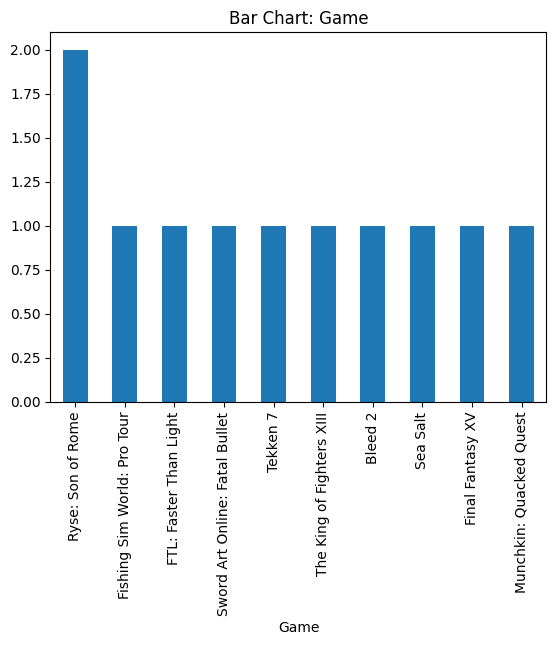

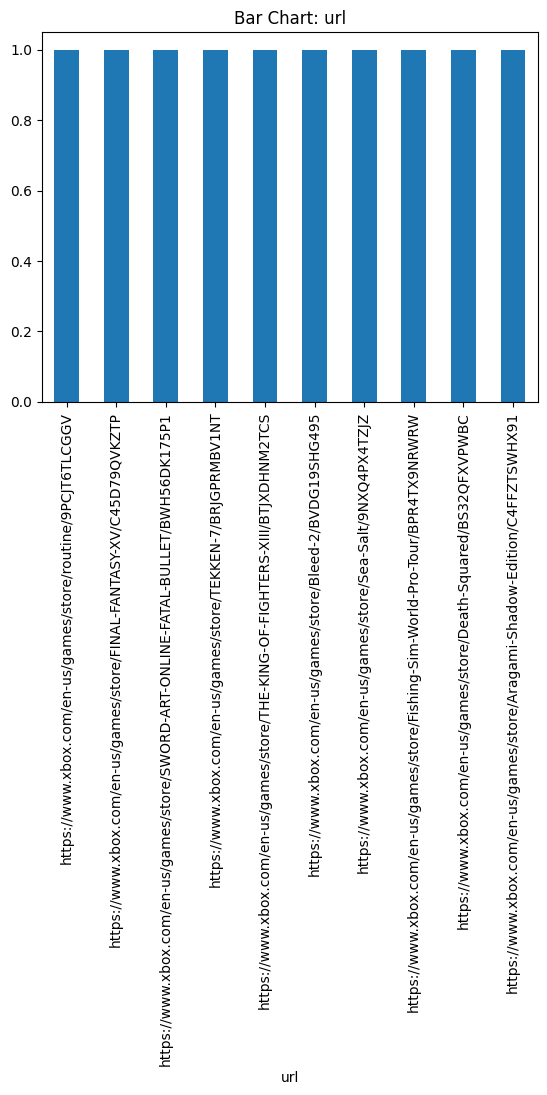

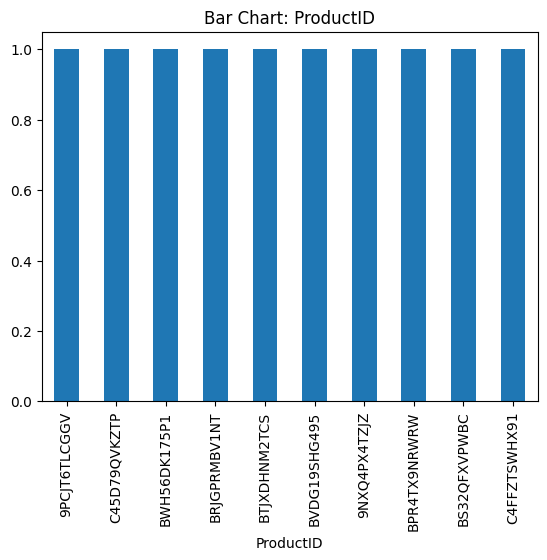

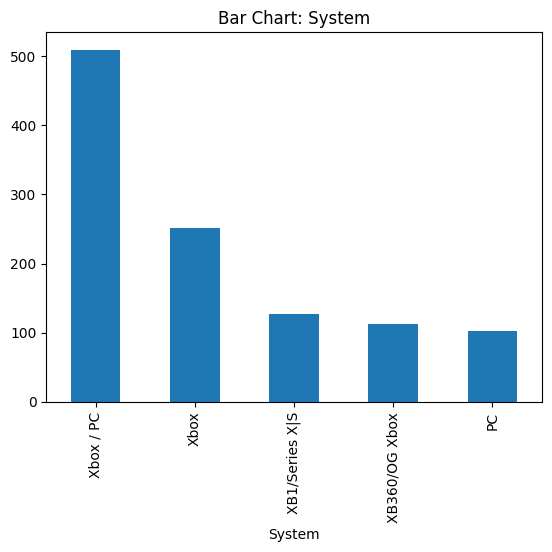

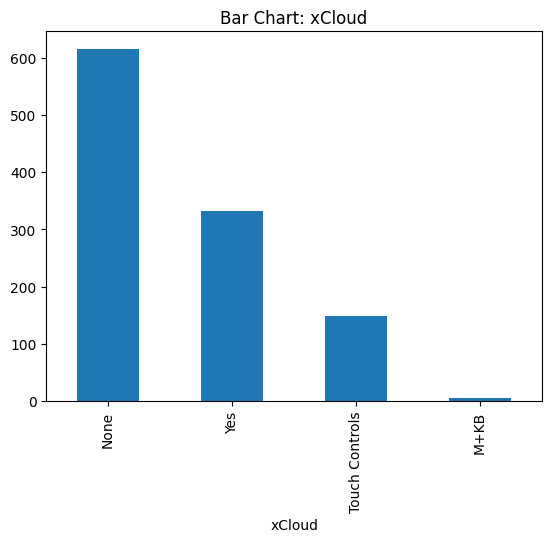

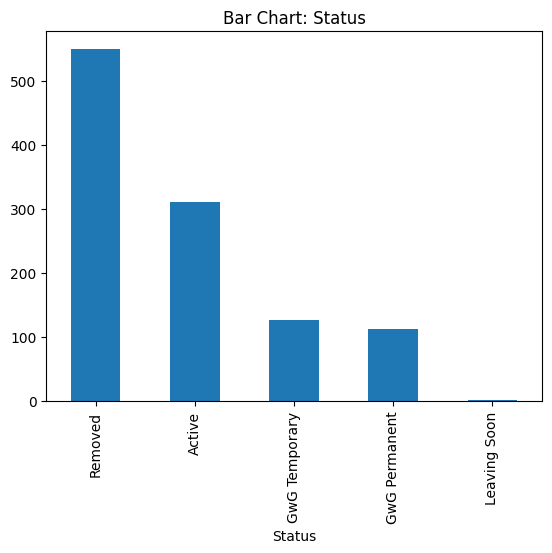

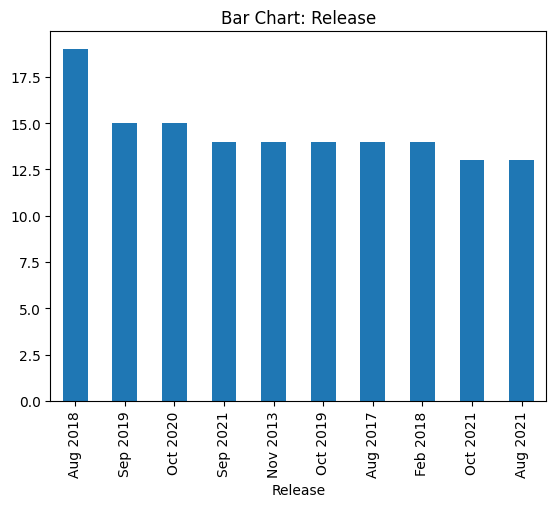

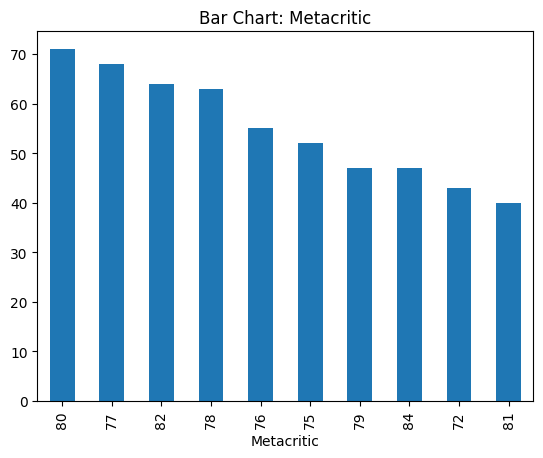

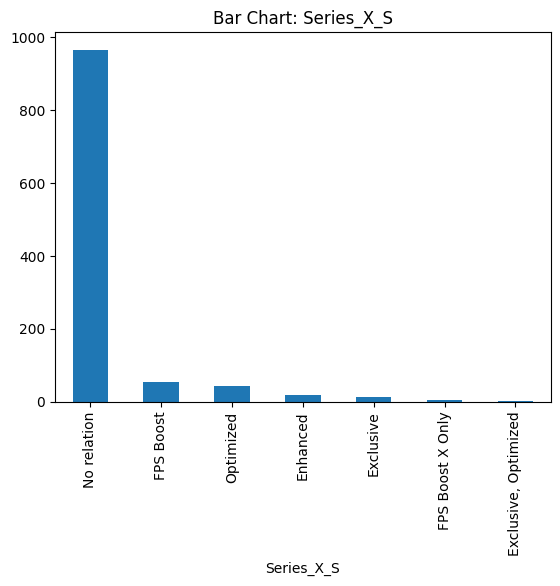

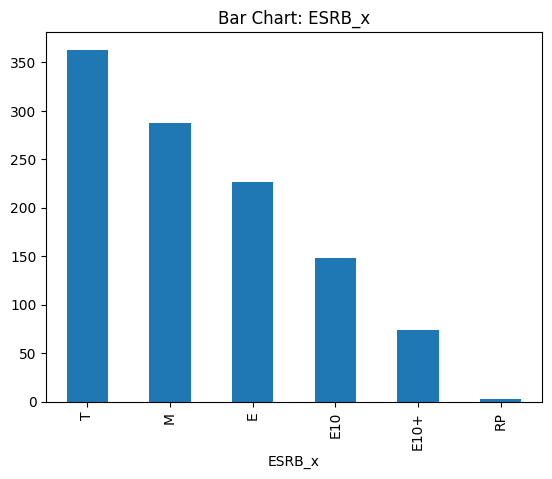

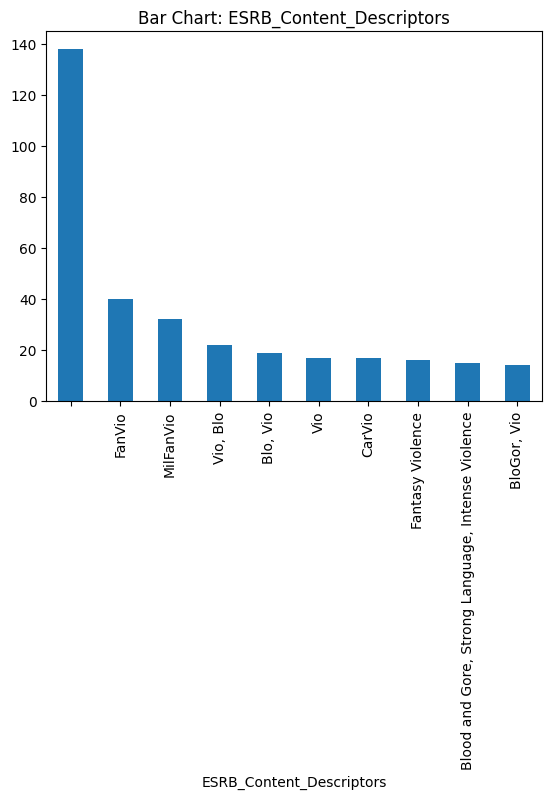

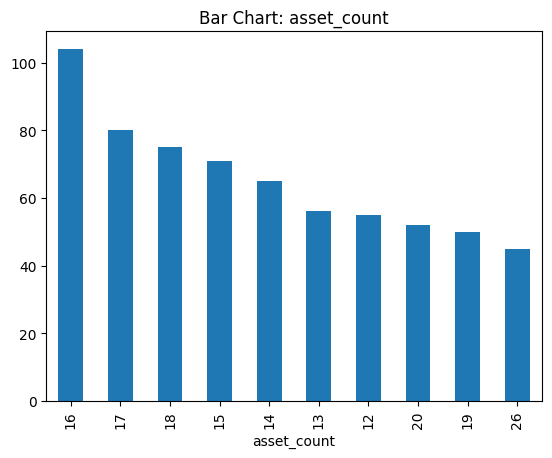

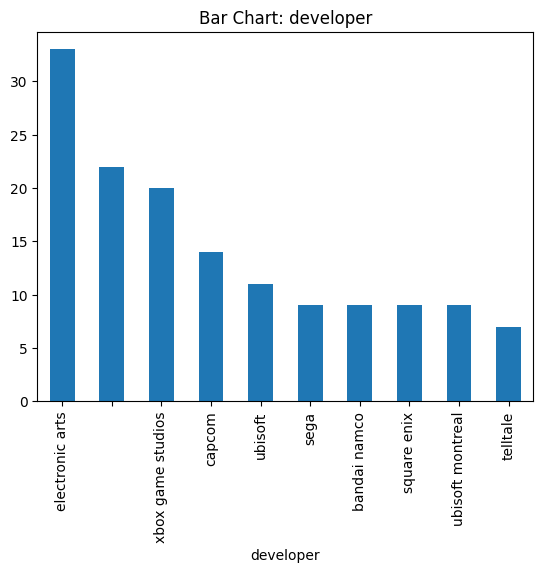

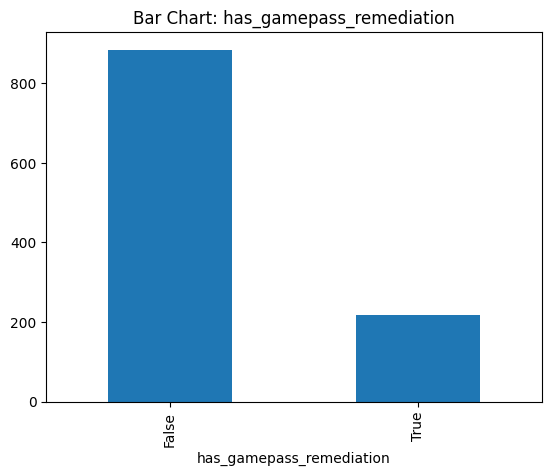

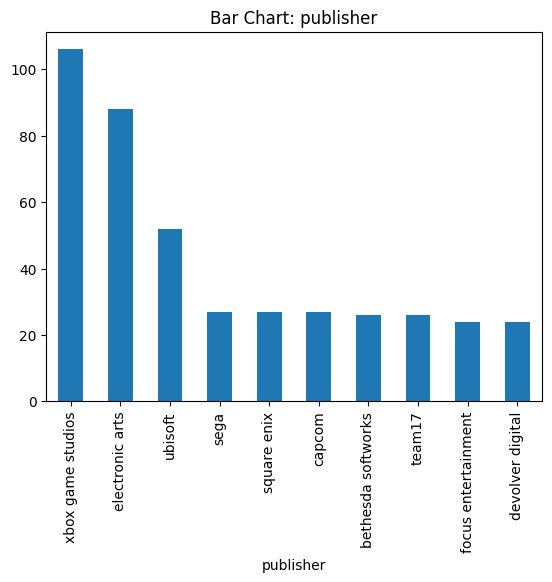

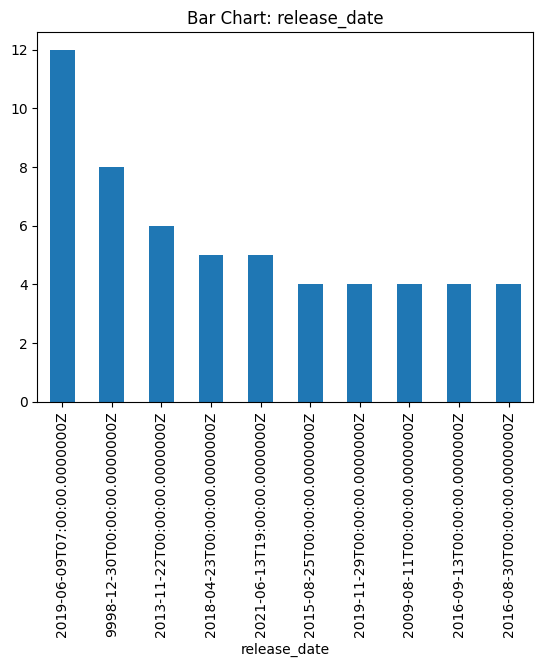

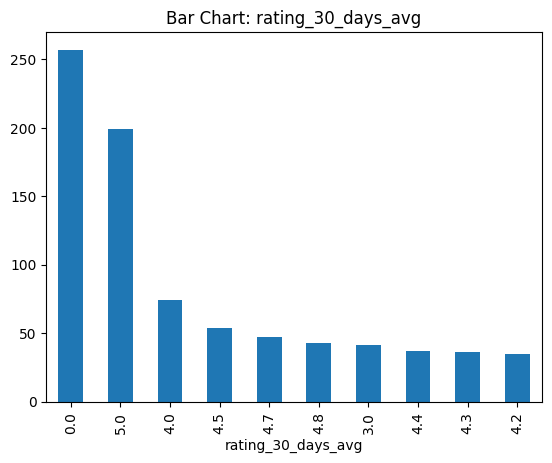

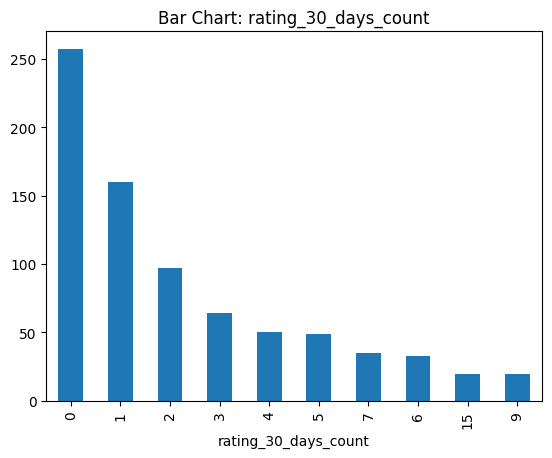

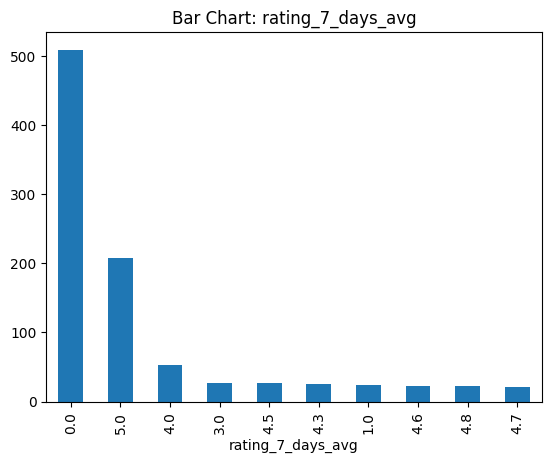

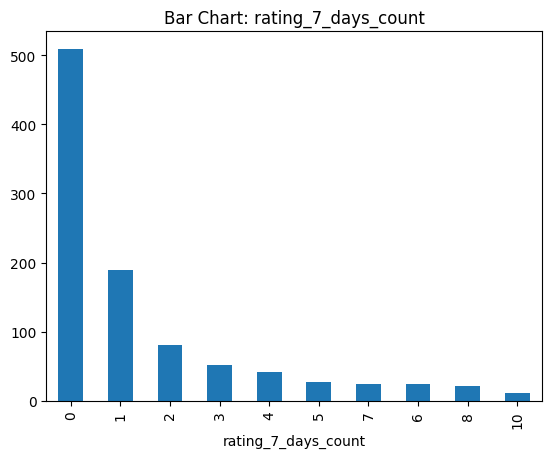

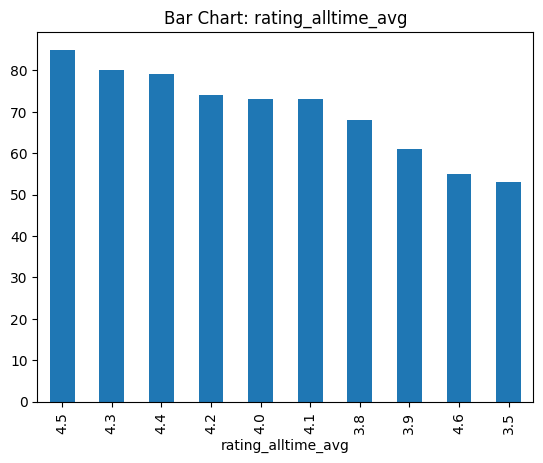

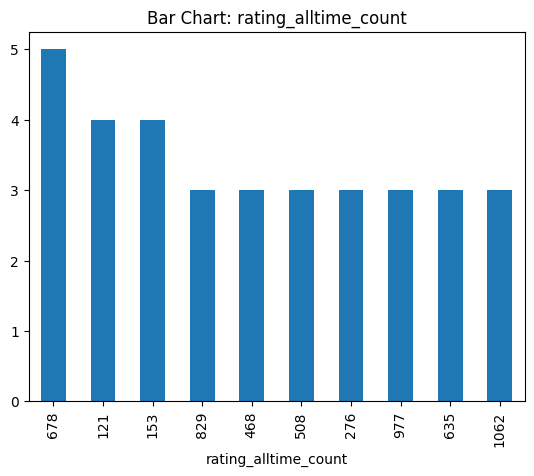

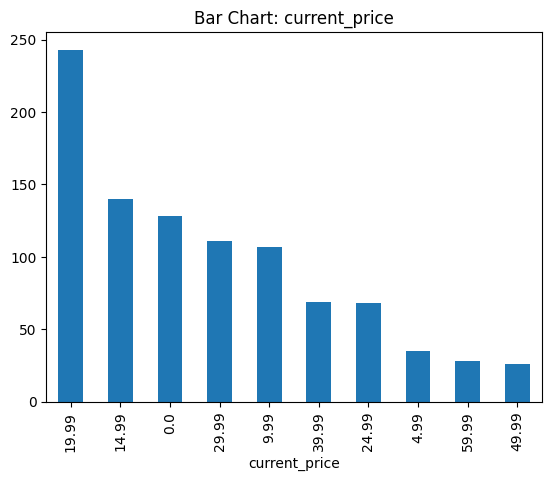

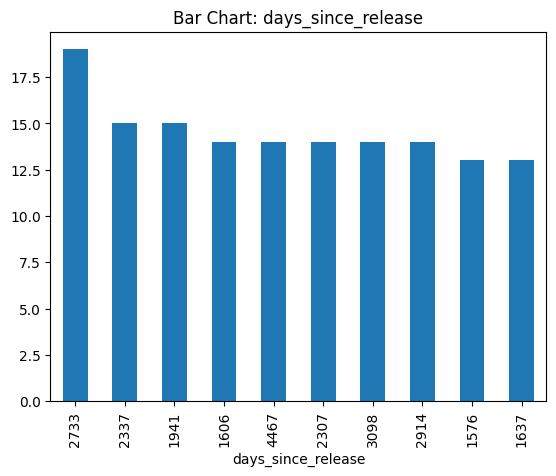

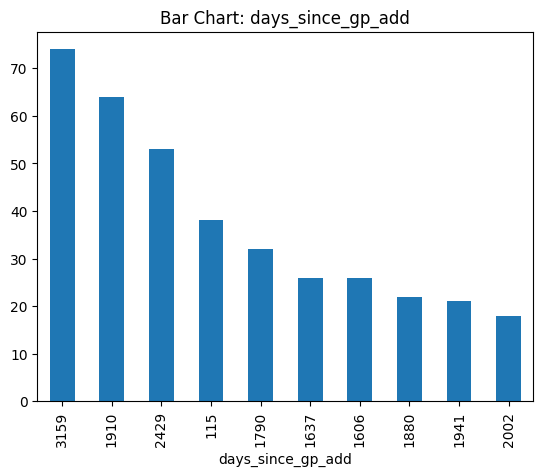

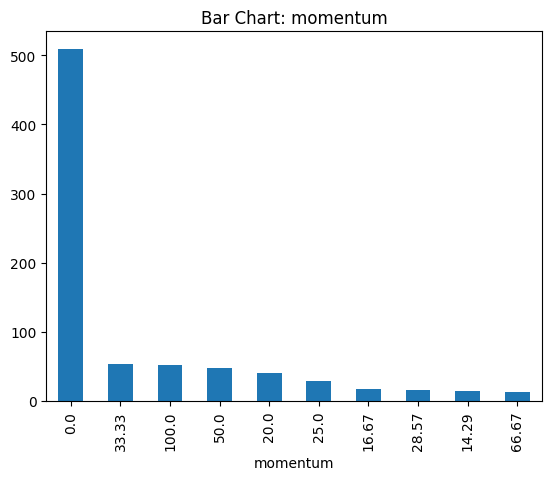

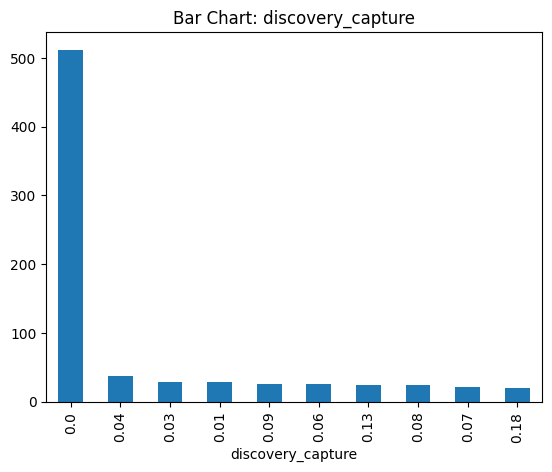

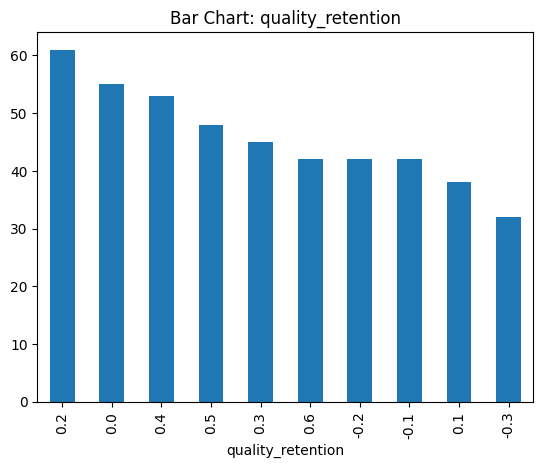

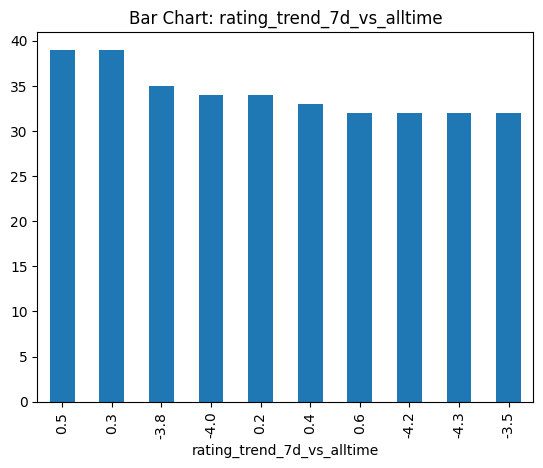

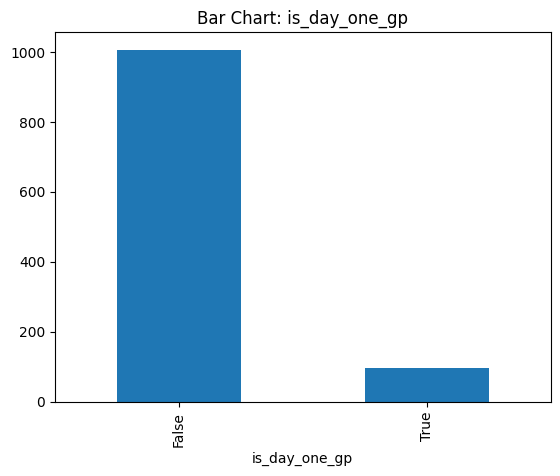

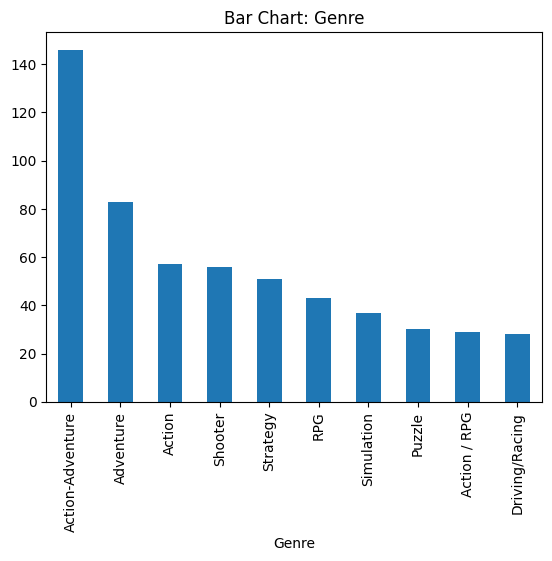

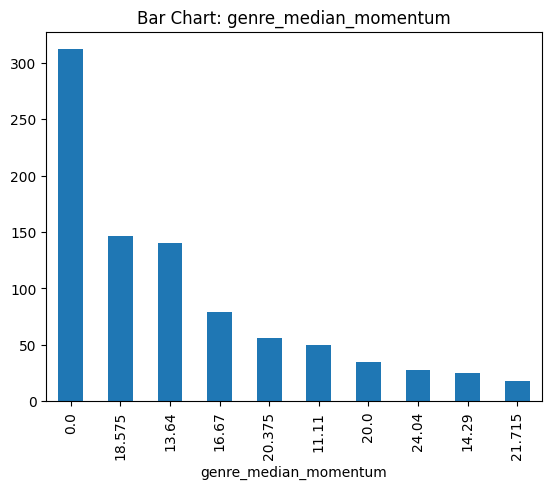

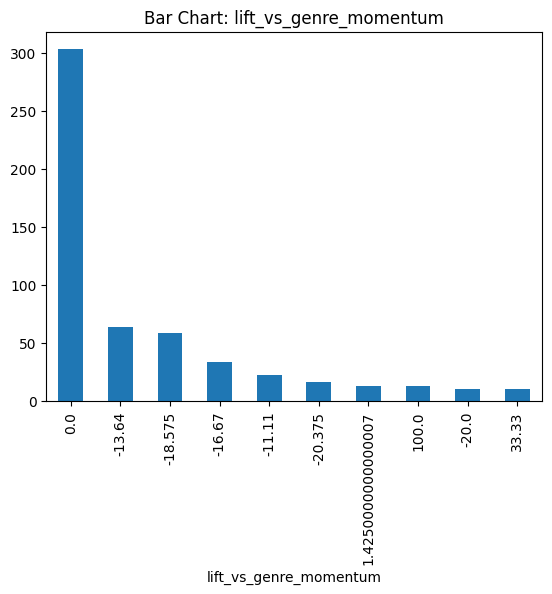

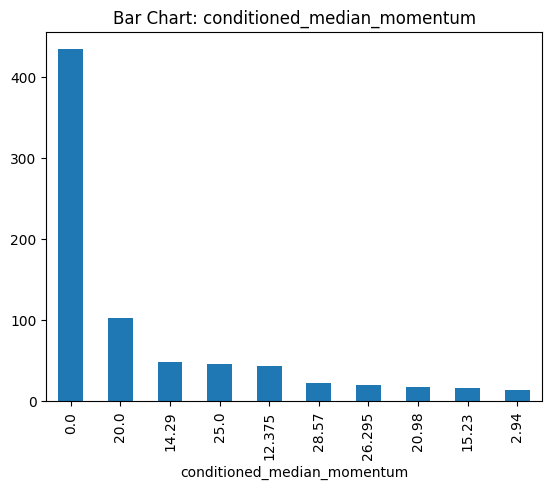

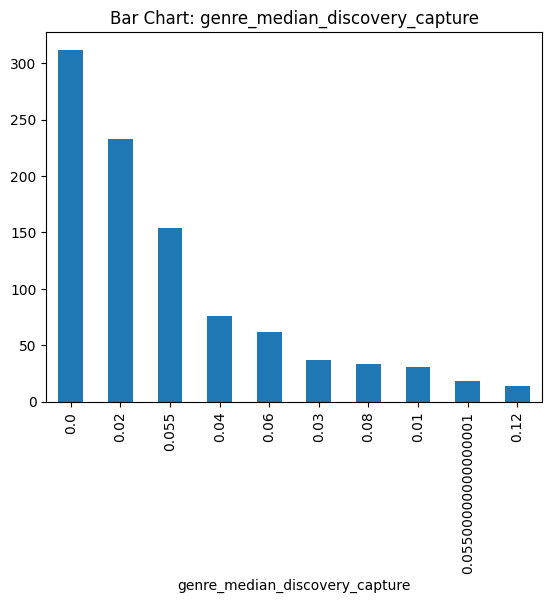

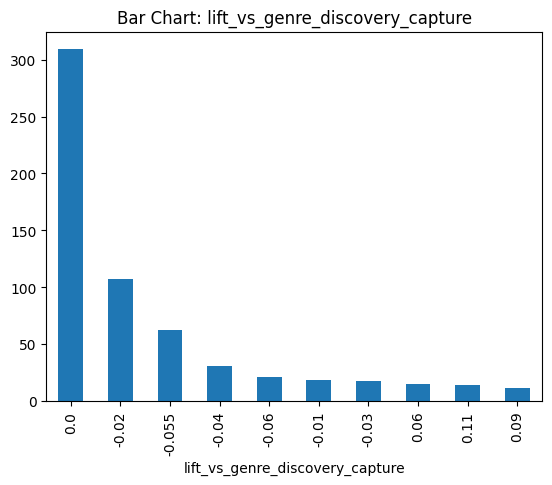

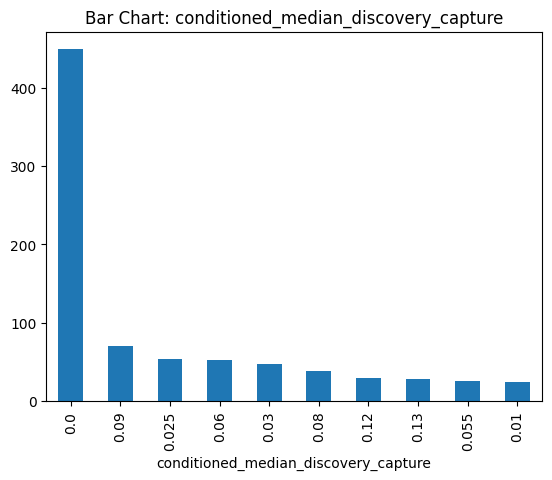

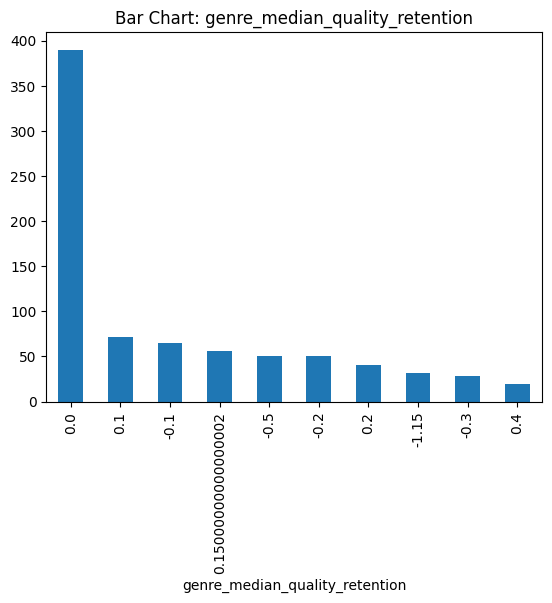

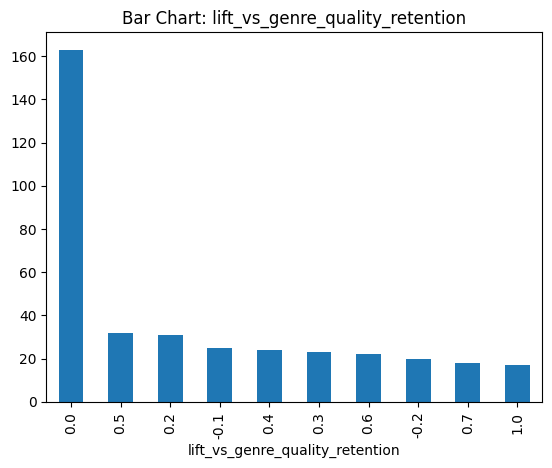

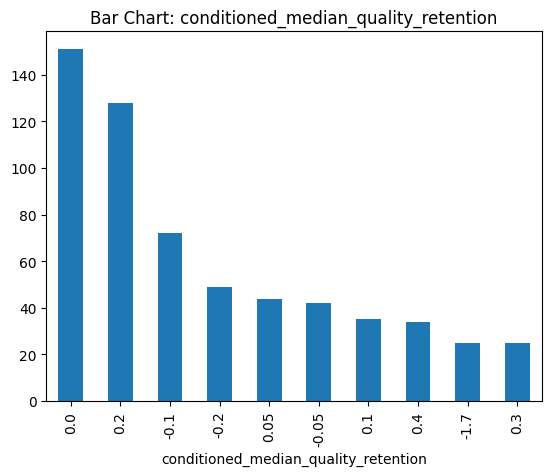

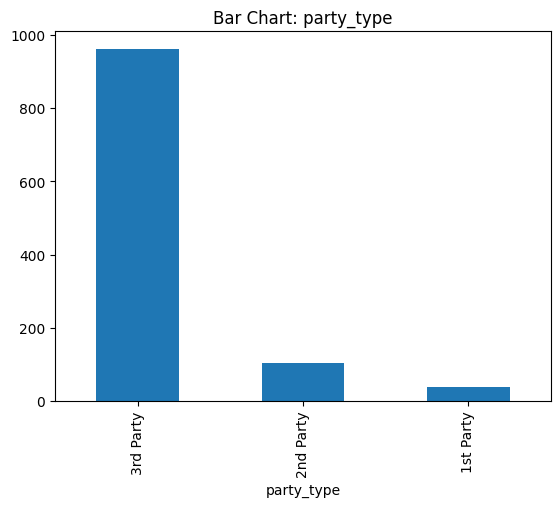

In [22]:
for col in final_df.columns:
    plt.figure()
    final_df[col].dtype == 'object' or final_df[col].nunique() < 10
    final_df[col].value_counts().head(10).plot(kind='bar')
    plt.title(f'Bar Chart: {col}')
    

In [7]:
final_df['current_price'] = (
    final_df['current_price']
    .astype(str)
    .str.extract(r'(\d+\.\d+|\d+)')
    .astype(float)
)

In [8]:
columns_to_drop = [col for col in final_df.columns if 'PlayCount' in col]
final_df = final_df.drop(columns=columns_to_drop)

/var/folders/bh/dh1w_fld0j96ldg4hvhzhdw00000gn/T/ipykernel_87283/1727549633.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df['current_price'] = (
/var/folders/bh/dh1w_fld0j96ldg4hvhzhdw00000gn/T/ipykernel_87283/1727549633.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df[col] = pd.to_numeric(final_df[col], errors='coerce')


asset_count              int64
rating_7_days_avg      float64
rating_7_days_count      int64
current_price          float64
days_since_release       int64
days_since_gp_add        int64
momentum               float64
discovery_capture      float64
quality_retention      float64
Metacritic             float64
dtype: object


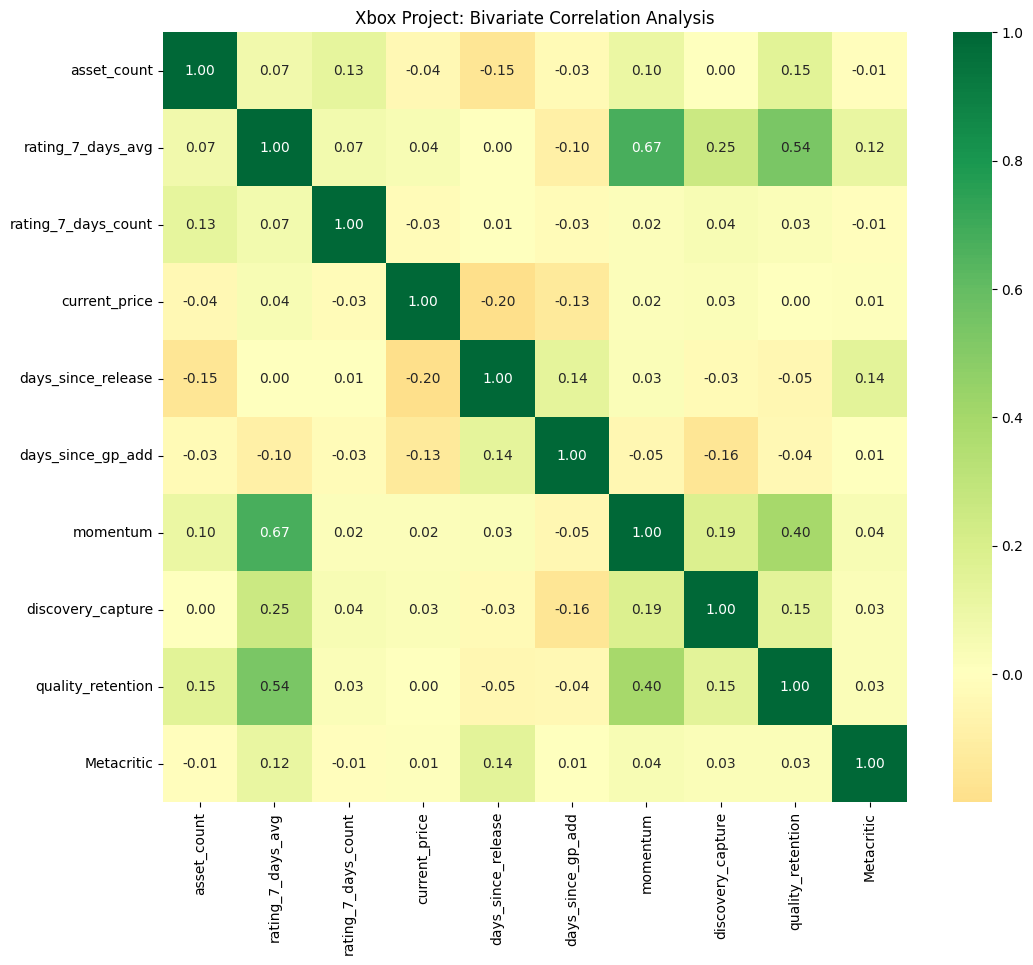

In [54]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#itereated the correlational matrix with different numerical columns to eventually get a matrix that I was happy with.
corr_cols = [
    'asset_count', 
    'rating_7_days_avg', 'rating_7_days_count',
    'current_price', 'days_since_release', 'days_since_gp_add',
    'momentum', 'discovery_capture', 'quality_retention',
    'Metacritic'
]

# 2. FORCE CLEANING: Step-by-step for the price specifically first
# This handles the '$', commas, and extra spaces in one regex sweep
final_df['current_price'] = (
    final_df['current_price']
    .astype(str)
    .str.replace(r'[^\d.]', '', regex=True) # Keep ONLY digits and dots
)

# 3. CONVERT ENTIRE SELECTION TO NUMERIC
# errors='coerce' is the secret—it turns " $ 89.00 " (if it failed) or "tbd" into NaN
for col in corr_cols:
    final_df[col] = pd.to_numeric(final_df[col], errors='coerce')

# 4. VERIFY - If this prints anything other than 'float64', we found the culprit
print(final_df[corr_cols].dtypes)

# 5. RUN CORRELATION
corr_matrix = final_df[corr_cols].corr()

# 6. PLOT
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='RdYlGn', center=0, fmt=".2f")
plt.title('Xbox Project: Bivariate Correlation Analysis')
plt.show()

This was one of the iterations of the other correlational matrixes that I tried to include with this that ultimalty did not work very well.

asset_count               int64
rating_7_days_avg       float64
rating_7_days_count       int64
current_price           float64
days_since_release        int64
days_since_gp_add         int64
momentum                float64
discovery_capture       float64
quality_retention       float64
rating_30_days_avg      float64
rating_30_days_count      int64
dtype: object


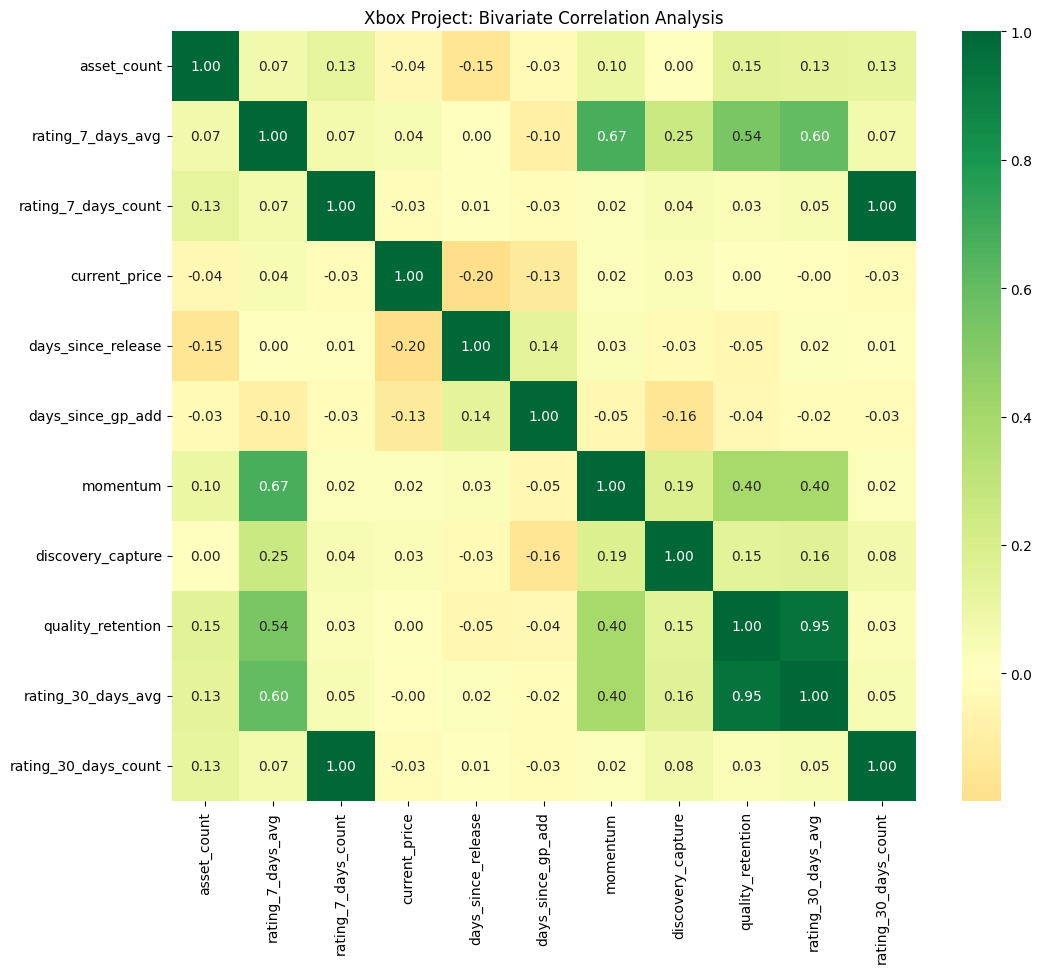

In [16]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#itereated the correlational matrix with different numerical columns to eventually get a matrix that I was happy with.
corr_cols = [
    'asset_count', 
    'rating_7_days_avg', 'rating_7_days_count',
    'current_price', 'days_since_release', 'days_since_gp_add',
    'momentum', 'discovery_capture', 'quality_retention', 'rating_30_days_avg','rating_30_days_count'
]

# 2. FORCE CLEANING: Step-by-step for the price specifically first
# This handles the '$', commas, and extra spaces in one regex sweep
final_df['current_price'] = (
    final_df['current_price']
    .astype(str)
    .str.replace(r'[^\d.]', '', regex=True) # Keep ONLY digits and dots
)

# 3. CONVERT ENTIRE SELECTION TO NUMERIC
# errors='coerce' is the secret—it turns " $ 89.00 " (if it failed) or "tbd" into NaN
for col in corr_cols:
    final_df[col] = pd.to_numeric(final_df[col], errors='coerce')

# 4. VERIFY - If this prints anything other than 'float64', we found the culprit
print(final_df[corr_cols].dtypes)

# 5. RUN CORRELATION
corr_matrix = final_df[corr_cols].corr()

# 6. PLOT
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='RdYlGn', center=0, fmt=".2f")
plt.title('Xbox Project: Bivariate Correlation Analysis')
plt.show()

In [10]:
numerical_cols_final = [
    'asset_count', 
    'rating_7_days_avg', 'rating_7_days_count',
    'current_price', 'days_since_release', 'days_since_gp_add',
    'momentum', 'discovery_capture', 'quality_retention','Metacritic'
]

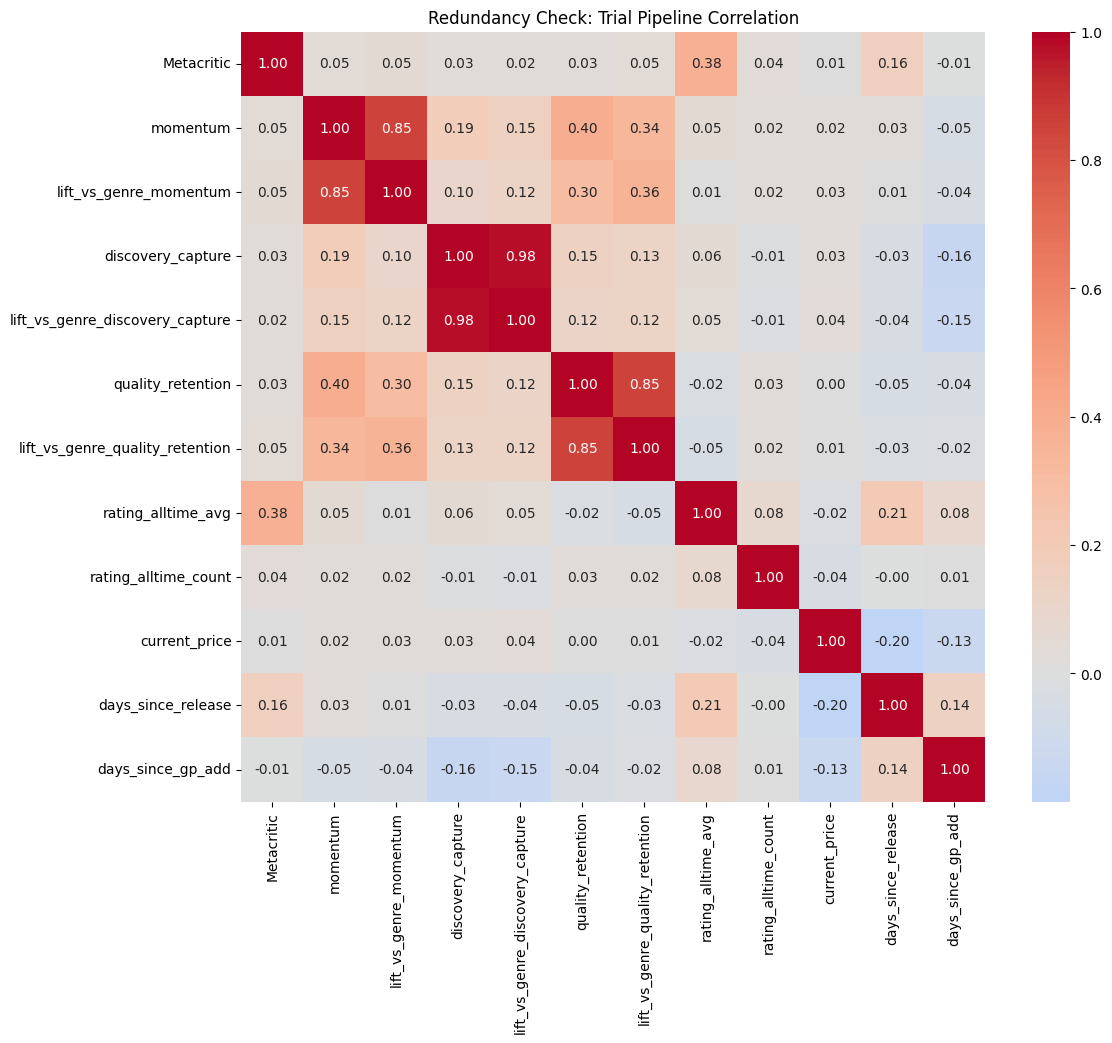

In [48]:

from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Define the columns we suspect are highly correlated
feature_candidates = [
    'Metacritic', 'momentum', 'lift_vs_genre_momentum', 
    'discovery_capture', 'lift_vs_genre_discovery_capture', 
    'quality_retention', 'lift_vs_genre_quality_retention',
    'rating_alltime_avg', 'rating_alltime_count', 'current_price', 
    'days_since_release', 'days_since_gp_add'
]

# 2. Preparation: Force numeric (coerce strings like ' $ 89.00 ' to NaN)
df_trial = final_df_csv[feature_candidates].copy()
for col in feature_candidates:
    df_trial[col] = pd.to_numeric(df_trial[col], errors='coerce')

# 3. Impute the gaps (Metacritic, etc.)
# We scale first because KNN depends on distance
scaler = StandardScaler()
imputer = KNNImputer(n_neighbors=5)

df_scaled = pd.DataFrame(scaler.fit_transform(df_trial), columns=feature_candidates)
df_imputed = pd.DataFrame(imputer.fit_transform(df_scaled), columns=feature_candidates)

# 4. Generate the "Truth" Correlation Matrix
trial_corr = df_imputed.corr()

# 5. Visualize the Redundancy
plt.figure(figsize=(12, 10))
sns.heatmap(trial_corr, annot=True, cmap='coolwarm', fmt=".2f", center=0)
plt.title("Redundancy Check: Trial Pipeline Correlation")
plt.show()

In [9]:
from sklearn.model_selection import train_test_split

# Train-Test Split
X_train, X_test = train_test_split(final_df, test_size=0.2, random_state=42)

print(f"Training set size: {X_train.shape[0]} rows")
print(f"Test set size: {X_test.shape[0]} rows")
print(f"Train-Test Split: {len(X_train) / len(final_df):.1%} train / {len(X_test) / len(final_df):.1%} test")


Training set size: 881 rows
Test set size: 221 rows
Train-Test Split: 79.9% train / 20.1% test


## Cramér's V Test for Categorical Variables

Test for associations between categorical variables to understand multicollinearity and feature relationships.


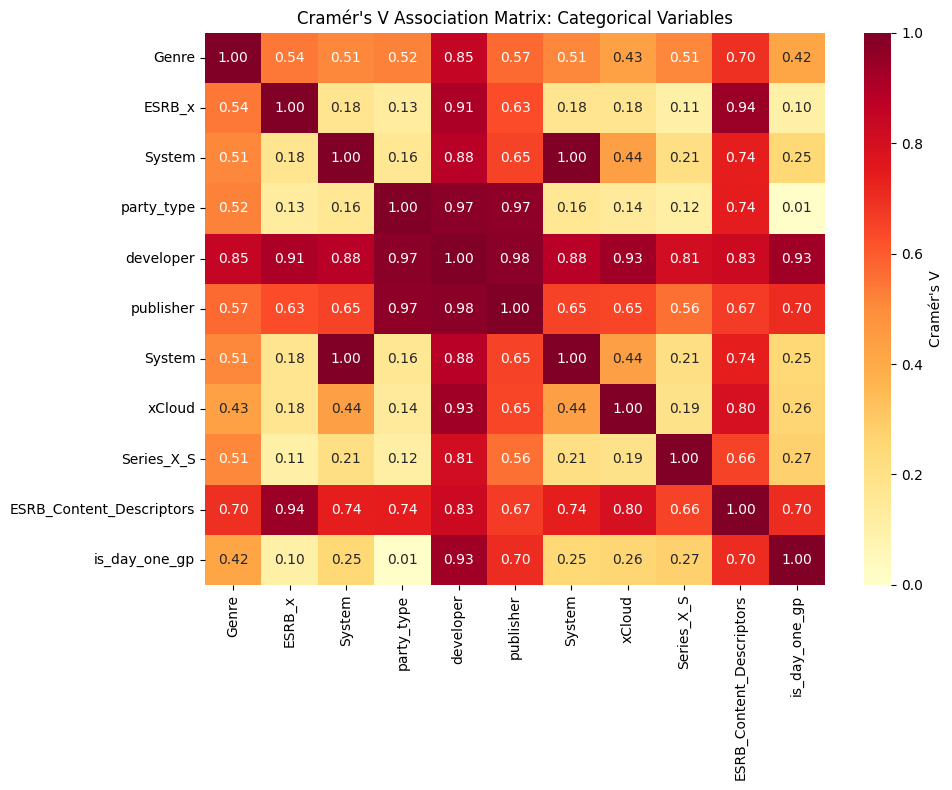


Cramér's V Matrix:
                          Genre  ESRB_x  System  party_type  developer  \
Genre                     1.000   0.543   0.510       0.521      0.850   
ESRB_x                    0.543   1.000   0.177       0.133      0.910   
System                    0.510   0.177   1.000       0.161      0.880   
party_type                0.521   0.133   0.161       1.000      0.974   
developer                 0.850   0.910   0.880       0.974      1.000   
publisher                 0.568   0.631   0.653       0.966      0.977   
System                    0.510   0.177   1.000       0.161      0.880   
xCloud                    0.432   0.177   0.440       0.143      0.933   
Series_X_S                0.508   0.105   0.213       0.116      0.812   
ESRB_Content_Descriptors  0.696   0.944   0.739       0.742      0.826   
is_day_one_gp             0.420   0.102   0.253       0.014      0.932   

                          publisher  System  xCloud  Series_X_S  \
Genre                   

In [18]:
import numpy as np
import pandas as pd
from scipy.stats import chi2_contingency

def cramers_v(x, y):
    """
    Calculate Cramér's V statistic for categorical association.
    Returns value between 0 and 1, where 0 = no association, 1 = perfect association
    """
    confusion_matrix = pd.crosstab(x, y)
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    min_dim = min(confusion_matrix.shape) - 1
    return np.sqrt(chi2 / (n * min_dim)) if min_dim > 0 else 0

# Define categorical columns for analysis
categorical_cols = ['Genre', 'ESRB_x', 'System', 'party_type', 'developer', 'publisher', 'System', 'xCloud', 'Series_X_S','ESRB_Content_Descriptors', 'is_day_one_gp']

# Calculate Cramér's V matrix for categorical variables
cramers_v_matrix = pd.DataFrame(np.zeros((len(categorical_cols), len(categorical_cols))), 
                                index=categorical_cols, 
                                columns=categorical_cols)

for i, col1 in enumerate(categorical_cols):
    for j, col2 in enumerate(categorical_cols):
        if i == j:
            cramers_v_matrix.iloc[i, j] = 1.0
        else:
            # Clean the data for Cramér's V calculation
            valid_idx = X_train[[col1, col2]].notna().all(axis=1)
            cramers_v_matrix.iloc[i, j] = cramers_v(
                X_train.loc[valid_idx, col1], 
                X_train.loc[valid_idx, col2]
            )

# Visualize the Cramér's V matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cramers_v_matrix, annot=True, fmt='.2f', cmap='YlOrRd', 
            cbar_kws={'label': "Cramér's V"}, vmin=0, vmax=1)
plt.title("Cramér's V Association Matrix: Categorical Variables")
plt.tight_layout()
plt.show()

print("\nCramér's V Matrix:")
print(cramers_v_matrix.round(3))
print("\nInterpretation: Values > 0.5 suggest strong categorical associations (potential multicollinearity)")


From CRAMER's V awe an essentially see that we are fucked so instead what I will try to do is to encode these columsn to make them numerical in ordeer to reduce the correlaation between each other and this will be done with a few types of encoding the 1st of which is a weighted mean of the all time scores as a way of bayesian target encoding for those with high cardinlaity. In adittion I will be adding one hot encoding for the ones with low cardinality and adding frequncy encoding to all of them and experimenting wiht them to see which of them has the lowes variance in the groups 

In [52]:
final_df.columns

Index(['Game', 'url', 'ProductID', 'System', 'xCloud', 'Status', 'Release',
       'Metacritic', 'Series_X_S', 'ESRB_x', 'ESRB_Content_Descriptors',
       'asset_count', 'developer', 'has_gamepass_remediation', 'publisher',
       'release_date', 'rating_30_days_avg', 'rating_30_days_count',
       'rating_30_days.TrialCount', 'rating_7_days_avg', 'rating_7_days_count',
       'rating_7_days.TrialCount', 'rating_alltime_avg',
       'rating_alltime_count', 'rating_alltime.TrialCount', 'current_price',
       'days_since_release', 'days_since_gp_add', 'momentum',
       'discovery_capture', 'quality_retention', 'rating_trend_7d_vs_alltime',
       'is_day_one_gp', 'Genre', 'genre_median_momentum',
       'lift_vs_genre_momentum', 'conditioned_median_momentum',
       'genre_median_discovery_capture', 'lift_vs_genre_discovery_capture',
       'conditioned_median_discovery_capture',
       'genre_median_quality_retention', 'lift_vs_genre_quality_retention',
       'conditioned_median_qua

In [ ]:
import mlflow

Good to know that KNN actually does not lot you impute catagorical variables because underlying stuff behinf all of this amchine learning stuff is that it is actually calculating the Euclidean (or Manhattan distance) between these two points and it could either be a numerical so it would need encoding before this 

In [13]:
print(X_train.isna().sum())


Game                                    0
url                                     0
ProductID                               0
System                                  0
xCloud                                  0
Status                                  0
Release                                 0
Series_X_S                              0
ESRB_x                                  0
ESRB_Content_Descriptors                0
asset_count                             0
developer                               0
has_gamepass_remediation                0
publisher                               0
release_date                            0
rating_30_days_avg                      0
rating_30_days_count                    0
rating_30_days.TrialCount               0
rating_7_days_avg                       0
rating_7_days_count                     0
rating_7_days.TrialCount                0
rating_alltime_avg                      0
rating_alltime_count                    0
rating_alltime.TrialCount         

In [20]:
X_train.dtypes

Game                                     object
url                                      object
ProductID                                object
System                                   object
xCloud                                   object
Status                                   object
Release                                  object
Series_X_S                               object
ESRB_x                                   object
ESRB_Content_Descriptors                 object
asset_count                               int64
developer                                object
has_gamepass_remediation                   bool
publisher                                object
release_date                             object
rating_30_days_avg                      float64
rating_30_days_count                      int64
rating_30_days.TrialCount                 int64
rating_7_days_avg                       float64
rating_7_days_count                       int64
rating_7_days.TrialCount                

## ML Pipeline: Categorical & Numerical Feature Engineering

Separate preprocessing pipelines for categorical and numerical features with appropriate transformations.


In [10]:
import category_encoders as ce
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import KNNImputer

# 1. Define your column groups
low_card_cols = ['System', 'xCloud', 'Series_X_S', 'is_day_one_gp', 'party_type']
high_card_cols = ['developer', 'publisher', 'Genre']
num_cols = [
    'asset_count', 'rating_alltime_avg', 'rating_alltime_count',
    'current_price', 'days_since_release', 'days_since_gp_add',
    'momentum', 'discovery_capture', 'quality_retention'
]

# 2. Build the Hybrid High-Cardinality Pipeline
# This applies BOTH Target and Frequency encoding to the same columns
high_card_pipe = Pipeline([
    ('target_enc', ce.TargetEncoder(smoothing=10, handle_missing='value')), # Weighted Mean
    ('freq_enc', ce.CountEncoder(normalize=True)),                        # Frequency
    ('imputer', KNNImputer(n_neighbors=5)),
    ('scaler', StandardScaler())                                          # Scaling is vital for KNN!
])

# 3. Build the Low-Cardinality Pipeline
low_card_pipe = Pipeline([
    ('ohe', OneHotEncoder(handle_unknown='ignore', sparse_output=False)),
    ('scaler', StandardScaler())
])

# 4. Build the Numerical Pipeline
num_pipe = Pipeline([
    ('imputer', KNNImputer(n_neighbors=5)),
    ('scaler', StandardScaler())
])

# 5. Combine everything into the final preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', num_pipe, num_cols),
        ('low_card', low_card_pipe, low_card_cols),
        ('high_card', high_card_pipe, high_card_cols)
    ],
    remainder='drop' # Drops IDs, URLs, and Names to prevent overfitting
)

# 6. Usage (Fit on Training only to avoid leakage)
# We use 'Metacritic' as the target for the TargetEncoder to create 'Pedigree'
X_train_preprocessed = preprocessor.fit_transform(X_train, y=X_train['rating_alltime_avg'])
X_test_preprocessed = preprocessor.transform(X_test)

In [11]:
X_train_preprocessed

array([[-0.17322348,  0.86626381, -0.09277642, ...,  0.82462409,
        -1.20095286,  0.02921314],
       [ 0.71330699,  0.21578146, -0.04597285, ...,  1.65515683,
         1.7599087 ,  0.45668147],
       [ 2.99295678,  0.54102264,  0.12440171, ...,  0.4944337 ,
         1.7599087 ,  2.11166367],
       ...,
       [-0.4265179 ,  0.70364322, -0.08709327, ...,  0.6595289 ,
        -0.46787647,  0.57930974],
       [ 0.8399542 ,  0.70364322, -0.09113839, ...,  0.6595289 ,
         1.7599087 , -1.32651038],
       [ 1.09324862, -0.92256265, -0.09113839, ..., -1.07595349,
        -1.06231769, -0.91356066]], shape=(881, 33))

In [12]:
# 1. Get the list of feature names from the preprocessor
feature_names = preprocessor.get_feature_names_out()

# 2. Convert the array back to a DataFrame using those names
X_train_processed_df = pd.DataFrame(X_train_preprocessed, columns=feature_names)

# 3. View the first few rows to confirm it worked!
print(X_train_processed_df.head())

   num__asset_count  num__rating_alltime_avg  num__rating_alltime_count  \
0         -0.173223                 0.866264                  -0.092776   
1          0.713307                 0.215781                  -0.045973   
2          2.992957                 0.541023                   0.124402   
3         -0.426518                -0.109460                  -0.087373   
4         -0.299871                -0.597321                  -0.095773   

   num__current_price  num__days_since_release  num__days_since_gp_add  \
0           -0.232844                -0.724455                0.191253   
1           -0.745440                 0.035091                0.475672   
2           -0.660007                -0.188002                1.252308   
3           -0.232844                 1.041801                1.323122   
4            0.407900                -1.627141               -2.246619   

   num__momentum  num__discovery_capture  num__quality_retention  \
0      -0.779151               -0.31

In [25]:
final_df['current_price'].value_counts()

current_price
19.99     243
14.99     140
0.00      128
29.99     111
9.99      107
39.99      69
24.99      68
4.99       35
59.99      28
49.99      26
3.74       10
7.99        9
11.99       9
15.99       8
34.99       8
16.99       8
7.49        8
2.99        8
3.99        7
2.49        7
12.99       6
69.99       4
6.59        4
1.99        3
17.99       3
6.99        3
44.99       2
399.99      2
4.49        2
18.99       2
21.99       2
2.24        2
20.99       2
10.99       2
12.49       2
14.49       1
22.99       1
49.49       1
89.99       1
6.49        1
2.29        1
31.95       1
5.49        1
48.49       1
1.49        1
8.74        1
13.99       1
6.24        1
19.49       1
34.49       1
13.19       1
54.99       1
21.49       1
79.99       1
109.99      1
119.99      1
0.99        1
8.99        1
199.99      1
Name: count, dtype: int64

Recheck the correlationbal matrix to make sure that the columns are not heavilly involved with one another 

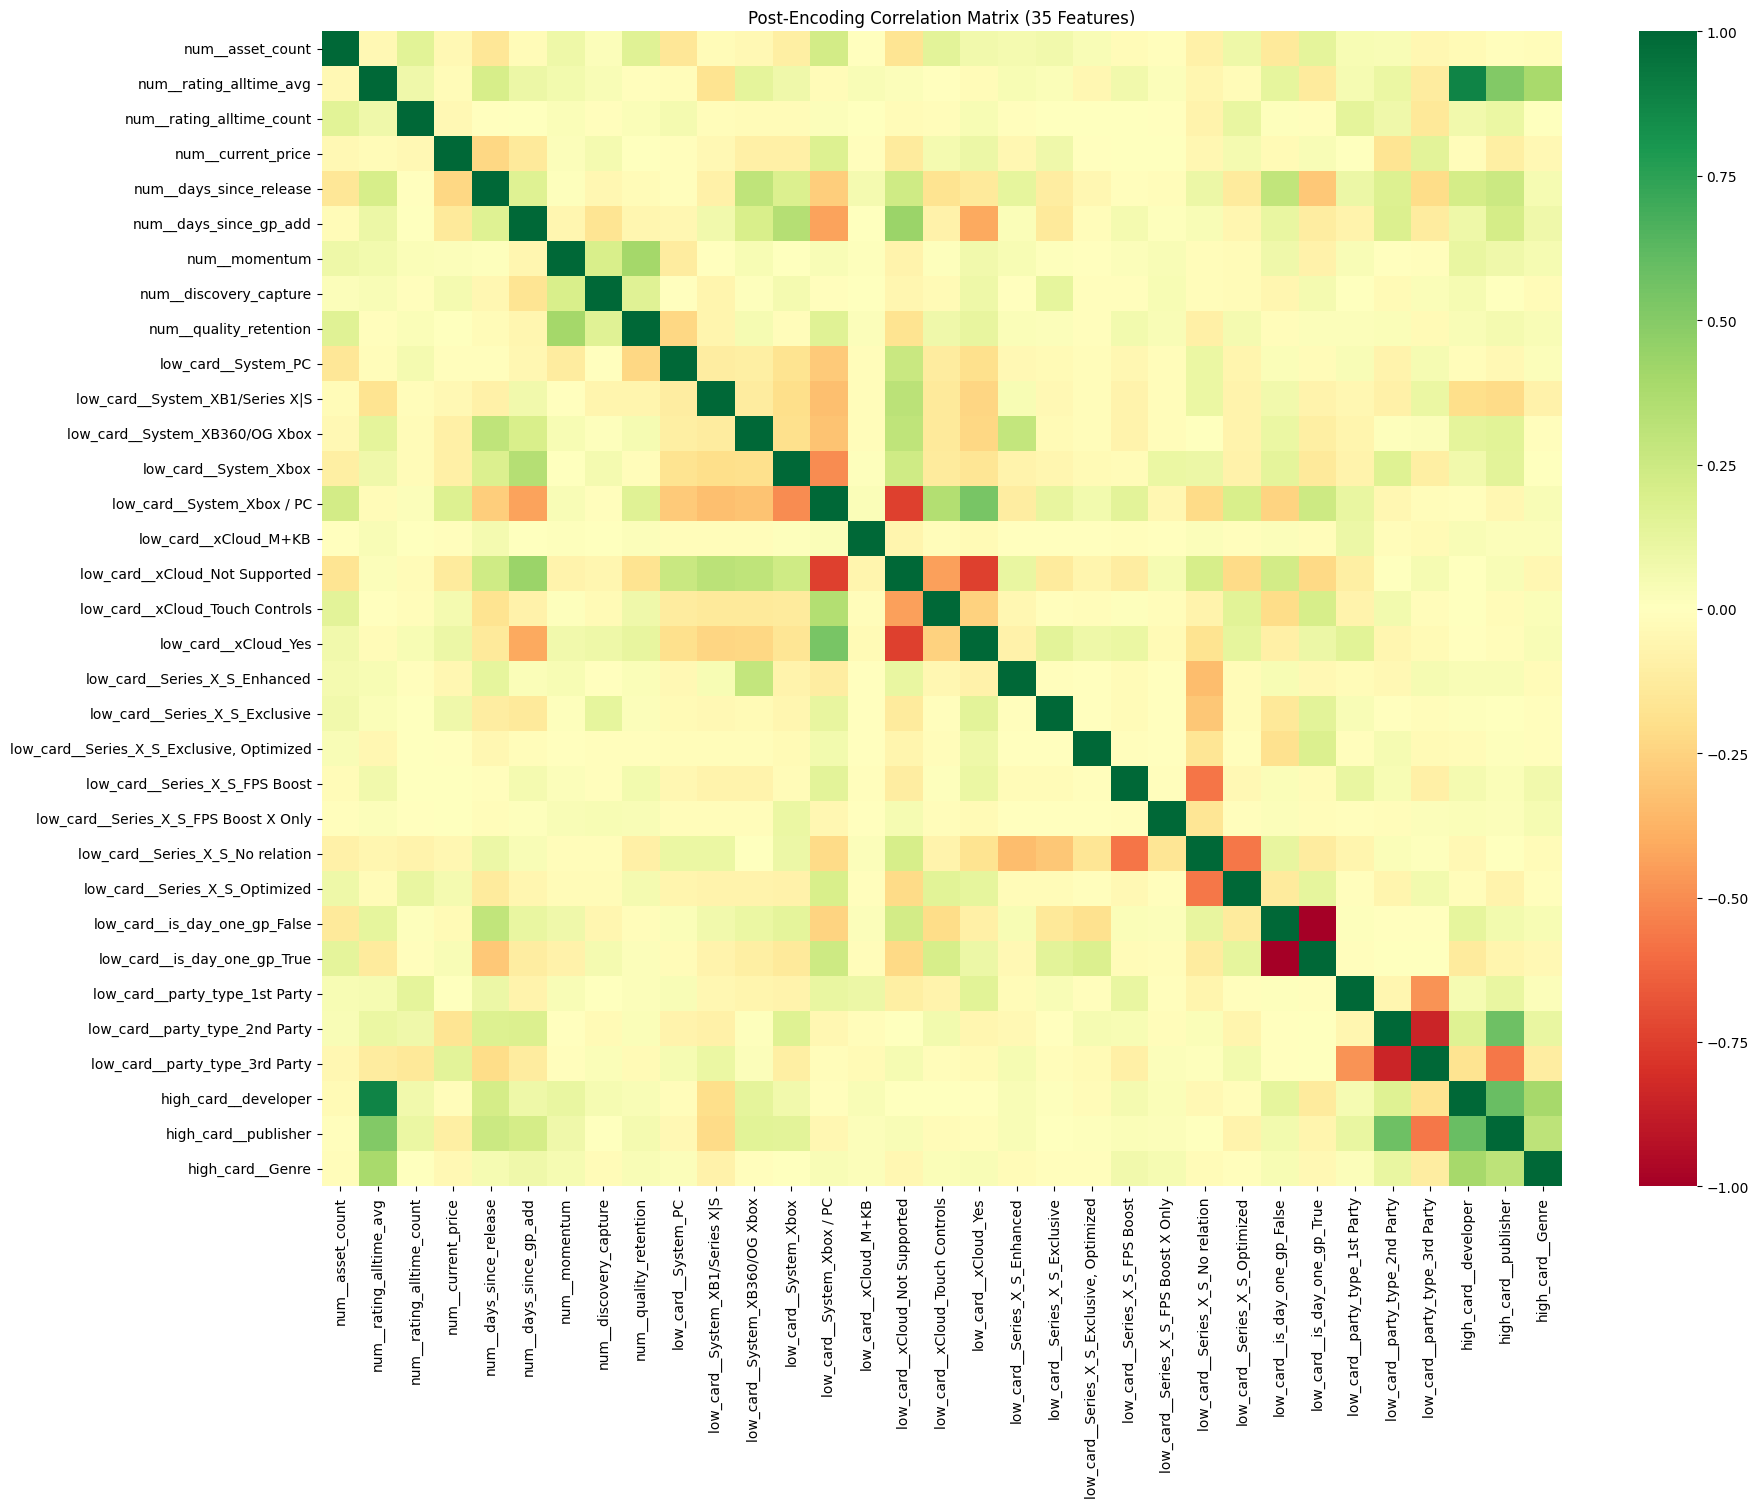

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Convert array to DataFrame
feature_names = preprocessor.get_feature_names_out()
X_processed_df = pd.DataFrame(X_train_preprocessed, columns=feature_names)

# 2. Calculate Pearson Correlation
corr_matrix = X_processed_df.corr()

# 3. Plot the Heatmap
plt.figure(figsize=(20, 15))
sns.heatmap(corr_matrix, annot=False, cmap='RdYlGn', center=0)
plt.title("Post-Encoding Correlation Matrix (35 Features)")
plt.show()

In [15]:
import numpy as np 
# 1. Calculate the absolute correlation matrix
corr_matrix = X_processed_df.corr().abs()

# 2. Select the upper triangle (to avoid duplicate pairs like A-B and B-A)
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# 3. Find index of feature columns with correlation greater than 0.75
to_drop = [column for column in upper.columns if any(upper[column] > 0.75)]

# 4. Display the specific pairs and their values for your review
high_corr_pairs = (upper[upper > 0.75]
                  .stack()
                  .reset_index()
                  .rename(columns={0: 'correlation', 'level_0': 'Feature A', 'level_1': 'Feature B'}))

print("High Correlation Pairs (> 0.75):")
print(high_corr_pairs)

High Correlation Pairs (> 0.75):
                        Feature A                       Feature B  correlation
0         num__rating_alltime_avg            high_card__developer     0.875402
1   low_card__is_day_one_gp_False    low_card__is_day_one_gp_True     1.000000
2  low_card__party_type_2nd Party  low_card__party_type_3rd Party     0.846354


Looking at this it seesm that the only one that we need to be absloutey worried about is the False and the True between the False and True which is to expected considering they are complete opposites 

Start off with a raw Kmeans meathod to see this inn action and if there is any elbow method that we could use here

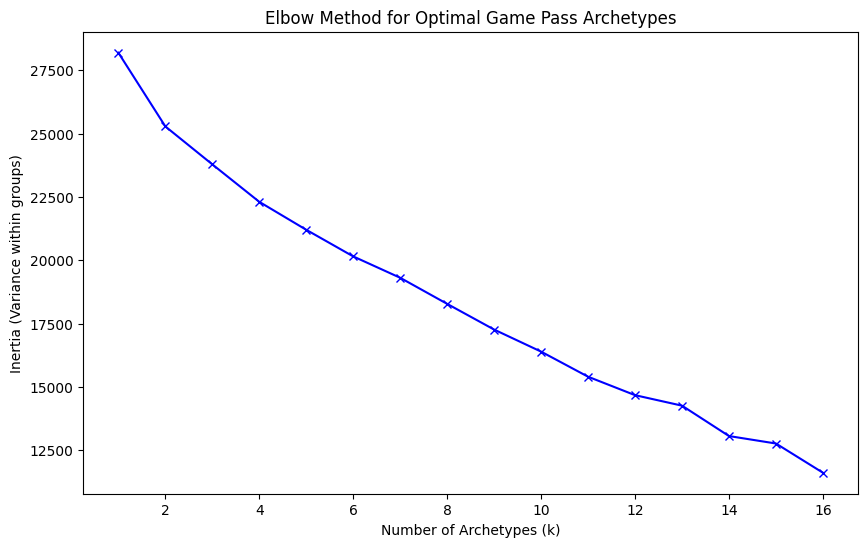

In [16]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# 1. Drop the redundant dummy variable
X_final = X_processed_df.drop(columns=['low_card__is_day_one_gp_False'])

# 2. Run the 'Elbow Method' to find the optimal number of archetypes
inertia = []
K = range(1, 17)
for k in K:
    km = KMeans(n_clusters=k, random_state=42, n_init=10)
    km.fit(X_final)
    inertia.append(km.inertia_)

# 3. Plot the results
plt.figure(figsize=(10,6))
plt.plot(K, inertia, 'bx-')
plt.xlabel('Number of Archetypes (k)')
plt.ylabel('Inertia (Variance within groups)')
plt.title('Elbow Method for Optimal Game Pass Archetypes')
plt.show()

From this we can see that there is actually no like clear drop off for this so I switched over to usin the silhoute score to actually make sure that there is a noticable drop off here

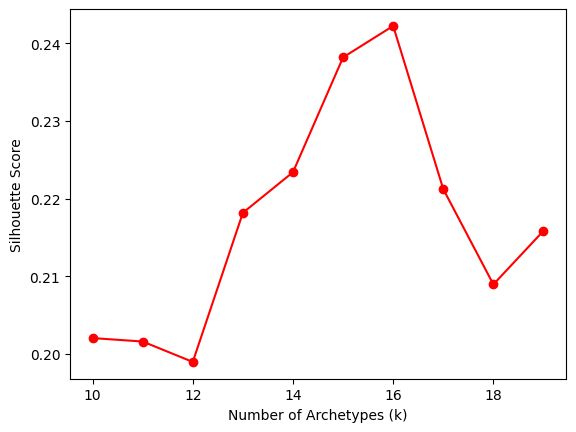

In [17]:
from sklearn.metrics import silhouette_score

# Calculate scores for different k values
s_scores = []
K_range = range(10, 20) # Silhouette isn't defined for k=1

for k in K_range:
    km = KMeans(n_clusters=k, random_state=42)
    labels = km.fit_predict(X_final)
    s_scores.append(silhouette_score(X_final, labels))

# Plotting the Silhouette Scores
plt.plot(K_range, s_scores, 'ro-')
plt.xlabel('Number of Archetypes (k)')
plt.ylabel('Silhouette Score')
plt.show()

/Users/aryapanda/Xbox ELT pipeline/.venv/lib/python3.12/site-packages/sklearn/manifold/_spectral_embedding.py:324: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(
/Users/aryapanda/Xbox ELT pipeline/.venv/lib/python3.12/site-packages/sklearn/manifold/_spectral_embedding.py:324: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(
/Users/aryapanda/Xbox ELT pipeline/.venv/lib/python3.12/site-packages/sklearn/manifold/_spectral_embedding.py:324: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(
/Users/aryapanda/Xbox ELT pipeline/.venv/lib/python3.12/site-packages/sklearn/manifold/_spectral_embedding.py:324: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(
/Users/aryapanda/Xbox ELT pipeline/.venv/lib/python3.12/site-packages/sklearn/manifold/_spectral_embedding.py:324: UserW

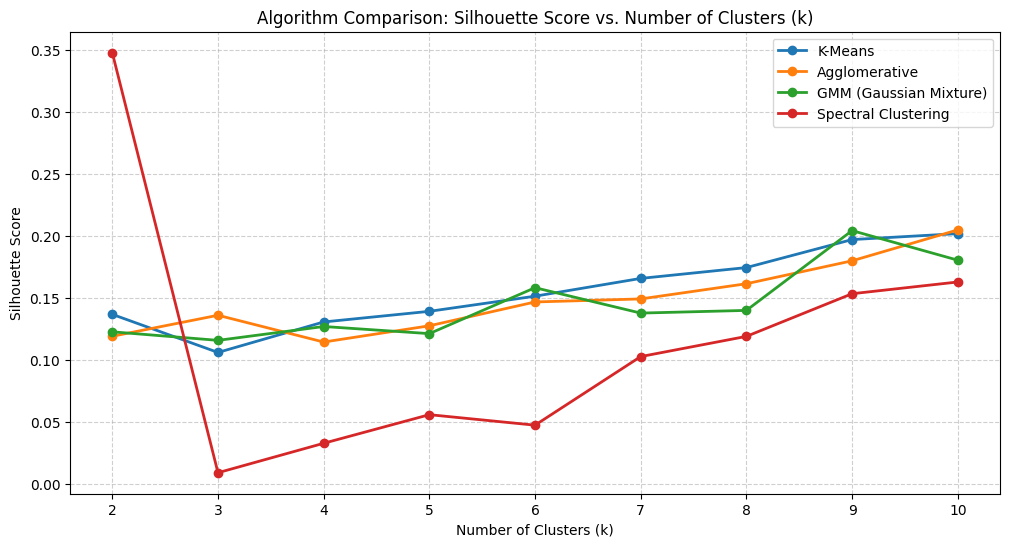

In [18]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans, AgglomerativeClustering, SpectralClustering
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

# 1. Prepare your Raw Data (Ensure it's scaled for a fair comparison)
# Even if we don't use PCA, scaling is mandatory for distance-based models
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_final) # Or your raw training set

k_range = range(2, 11)
results = {
    'K-Means': [],
    'Agglomerative': [],
    'GMM (Gaussian Mixture)': [],
    'Spectral Clustering': []
}

for k in k_range:
    # --- K-Means ---
    km = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels_km = km.fit_predict(X_scaled)
    results['K-Means'].append(silhouette_score(X_scaled, labels_km))
    
    # --- Agglomerative (Hierarchical) ---
    agg = AgglomerativeClustering(n_clusters=k)
    labels_agg = agg.fit_predict(X_scaled)
    results['Agglomerative'].append(silhouette_score(X_scaled, labels_agg))
    
    # --- GMM (Soft Clustering) ---
    gmm = GaussianMixture(n_components=k, random_state=42)
    labels_gmm = gmm.fit_predict(X_scaled)
    results['GMM (Gaussian Mixture)'].append(silhouette_score(X_scaled, labels_gmm))
    
    # --- Spectral Clustering ---
    # This uses a Nearest Neighbors graph (likely what you meant by KNN clustering)
    spec = SpectralClustering(n_clusters=k, affinity='nearest_neighbors', random_state=42)
    labels_spec = spec.fit_predict(X_scaled)
    results['Spectral Clustering'].append(silhouette_score(X_scaled, labels_spec))

# 2. Plotting the Comparison
plt.figure(figsize=(12, 6))
for algo, scores in results.items():
    plt.plot(k_range, scores, marker='o', label=algo, linewidth=2)

plt.title('Algorithm Comparison: Silhouette Score vs. Number of Clusters (k)')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

In [57]:
# ...existing code...
from sklearn.ensemble import IsolationForest

iso = IsolationForest(contamination=0.01, random_state=42)
mask = iso.fit_predict(X_final) == 1
X_final = X_final[mask]
# then re-run PCA/UMAP + clustering on X_clean
# ...existing code...

So from this we can see that probably the best thing to do with this is to use K = 9 because it has a silhoute score of above .20 and also is one of the only models that shows an increase the other model that shows anything is spectral clustering but it reaches its peak silhoute score at 2 which splitting up the things into 2 is not the most useful. The other models will likely be discriminated because they do not increasingly grows and have flat performances this is likely because for the gaussian mixture it assumes the bull curve dist onto different clusters while the tree based nature of the hiearchal clusetring likely did not work 


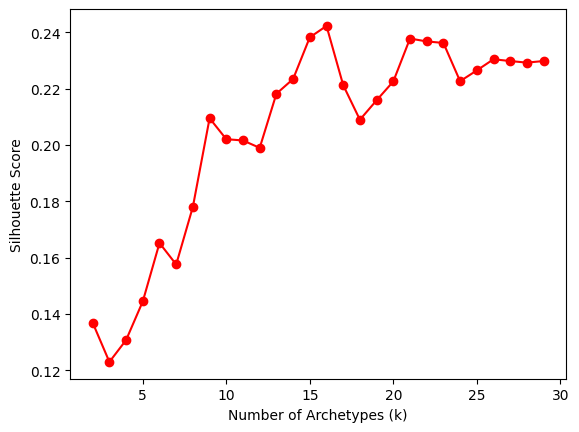

In [19]:
from sklearn.metrics import silhouette_score

# Calculate scores for different k values
s_scores = []
K_range = range(2, 30) # Silhouette isn't defined for k=1

for k in K_range:
    km = KMeans(n_clusters=k, random_state=42)
    labels = km.fit_predict(X_final)
    s_scores.append(silhouette_score(X_final, labels))

# Plotting the Silhouette Scores
plt.plot(K_range, s_scores, 'ro-')
plt.xlabel('Number of Archetypes (k)')
plt.ylabel('Silhouette Score')
plt.show()

From this it loks like it has beena CAP of .21 for the silhoute score which is actually absymal so I will try to do things like PCA and then try other clustering algorithims especially with Hiearchal Clustering since we are using the Silhoute Score and not the other thing

### Hiearchal Scans ###

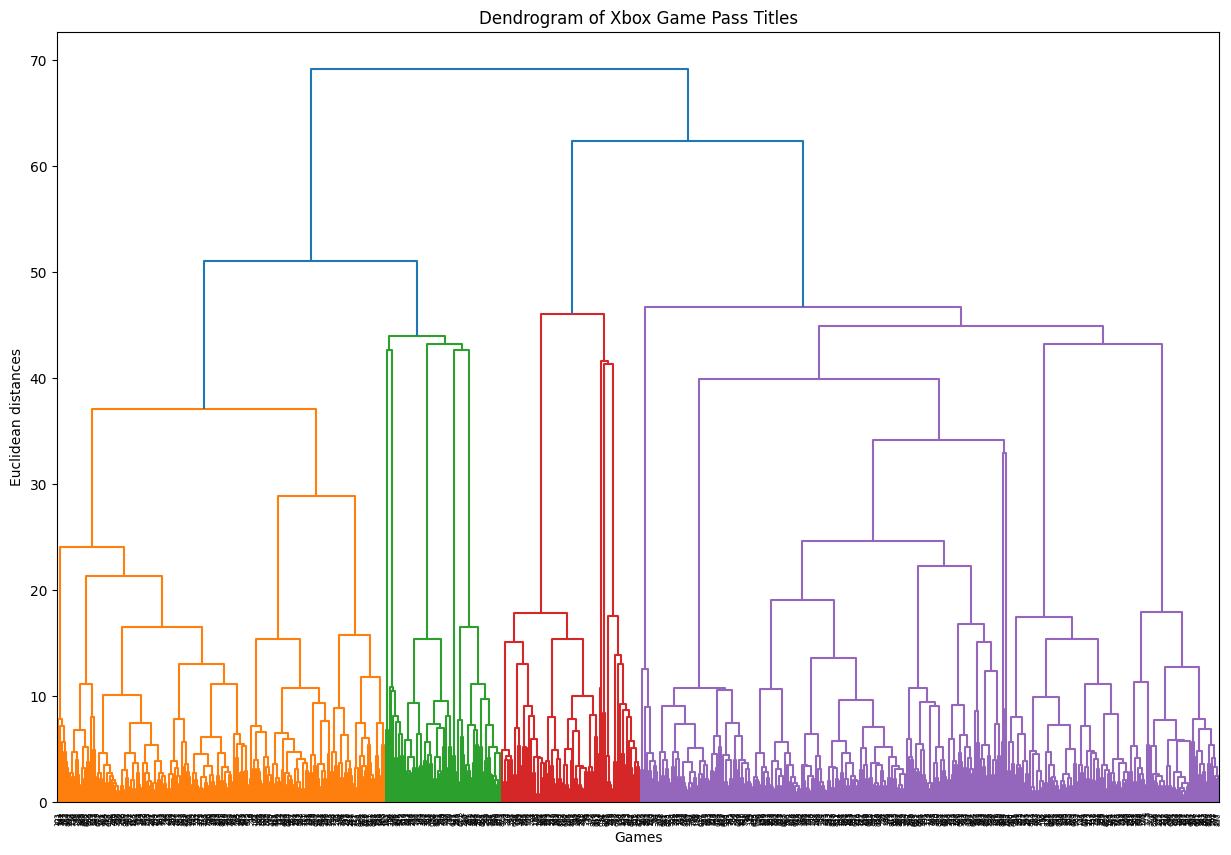

In [20]:
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

# 1. Create the Dendrogram to visualize the "branches" of Game Pass
plt.figure(figsize=(15, 10))
dendrogram = sch.dendrogram(sch.linkage(X_final, method='ward'))
plt.title('Dendrogram of Xbox Game Pass Titles')
plt.xlabel('Games')
plt.ylabel('Euclidean distances')
plt.show()

# 2. Apply the model (you can choose a 'cut' point based on the dendrogram)
cluster = AgglomerativeClustering(n_clusters=7, metric='euclidean', linkage='ward')
cluster_labels = cluster.fit_predict(X_final)

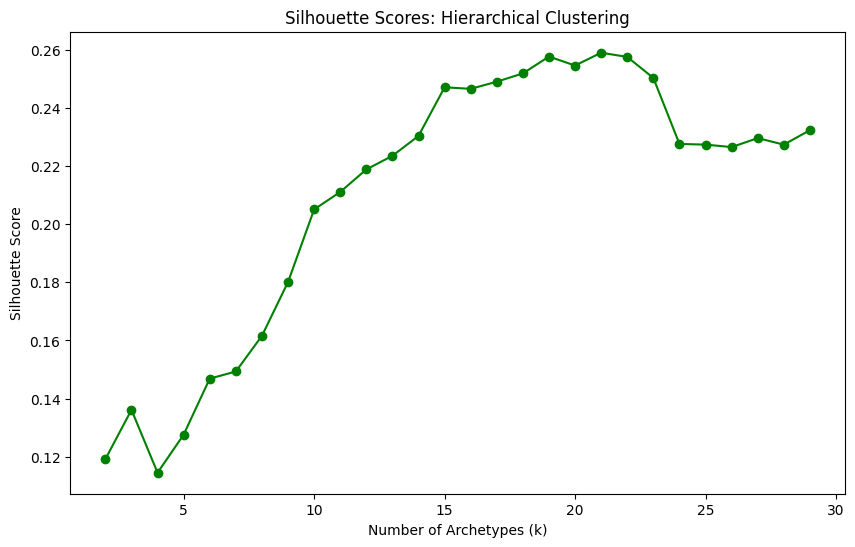

In [21]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import AgglomerativeClustering

# Define a range of possible archetypes (e.g., 2 to 20)
s_scores_hierarchical = []
K_range = range(2, 30)

for k in K_range:
    # Note: Using 'metric' instead of 'affinity' for newer sklearn versions
    hc = AgglomerativeClustering(n_clusters=k, metric='euclidean', linkage='ward')
    labels = hc.fit_predict(X_final)
    s_scores_hierarchical.append(silhouette_score(X_final, labels))

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(K_range, s_scores_hierarchical, 'go-')
plt.title('Silhouette Scores: Hierarchical Clustering')
plt.xlabel('Number of Archetypes (k)')
plt.ylabel('Silhouette Score')
plt.show()

So that did not work the best either so I will try PCA (principla component analysis in order to make sure that we are only getting selections from this that are correlated with the data)

### PCA BABY! ###

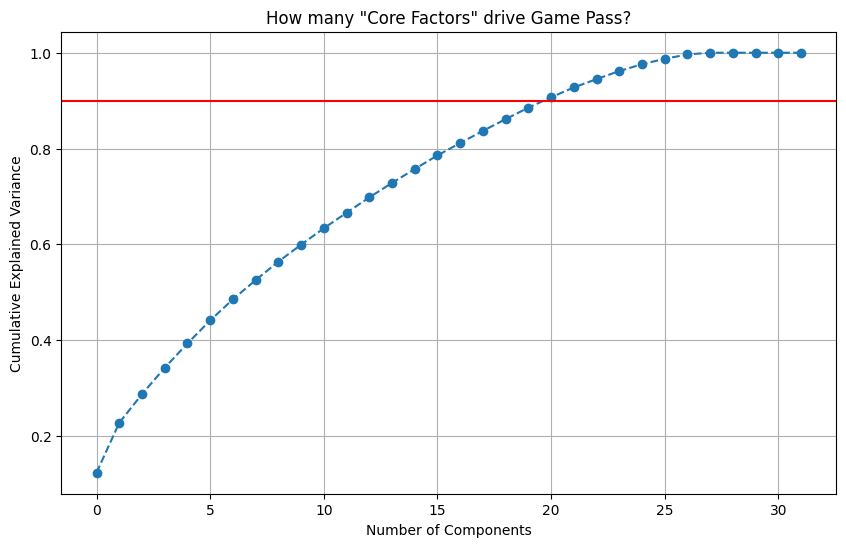

Variance explained by first 5 components: 39.29%


In [22]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# 1. Fit PCA to your 34/35 features (after dropping the Day One False column)
pca = PCA().fit(X_final)

# 2. Plot the Cumulative Explained Variance
plt.figure(figsize=(10, 6))
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o', linestyle='--')
plt.axhline(y=0.90, color='r', linestyle='-') # 90% Variance threshold
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('How many "Core Factors" drive Game Pass?')
plt.grid(True)
plt.show()

# 3. Print the variance captured by each component
print(f"Variance explained by first 5 components: {np.sum(pca.explained_variance_ratio_[:5]):.2%}")

### Ineterpretation ###
From this I was hoping to see that a small amount of factors held like a lot of the variance but that woudl also mean that the data from this would not have been the most complext but it looks like it is a very complex data set so I will be working on seeing what features from this are the most predictable 

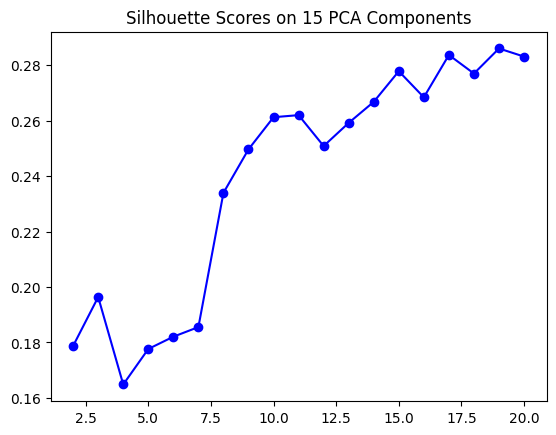

In [ ]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

# 1. Reduce to 15 components (where the curve starts to level off)
pca = PCA(n_components=15)
X_pca = pca.fit_transform(X_final)

# 2. Re-run your Silhouette check on this cleaner data
s_scores_pca = []
for k in range(2, 21):
    km = KMeans(n_clusters=k, random_state=42)
    labels = km.fit_predict(X_pca)
    s_scores_pca.append(silhouette_score(X_pca, labels))

# 3. Check the peak - is it higher than 0.24?
plt.plot(range(2, 21), s_scores_pca, 'bo-')
plt.title('Silhouette Scores on 15 PCA Components')
plt.show()

So it seems like PCA will not be the best method to then get rid of the curse of dimensionlaity ans 

In [45]:
X_final.columns

Index(['num__asset_count', 'num__rating_alltime_avg',
       'num__rating_alltime_count', 'num__current_price',
       'num__days_since_release', 'num__days_since_gp_add', 'num__momentum',
       'num__discovery_capture', 'num__quality_retention',
       'low_card__System_PC', 'low_card__System_XB1/Series X|S',
       'low_card__System_XB360/OG Xbox', 'low_card__System_Xbox',
       'low_card__System_Xbox / PC', 'low_card__xCloud_M+KB',
       'low_card__xCloud_Not Supported', 'low_card__xCloud_Touch Controls',
       'low_card__xCloud_Yes', 'low_card__Series_X_S_Enhanced',
       'low_card__Series_X_S_Exclusive',
       'low_card__Series_X_S_Exclusive, Optimized',
       'low_card__Series_X_S_FPS Boost',
       'low_card__Series_X_S_FPS Boost X Only',
       'low_card__Series_X_S_No relation', 'low_card__Series_X_S_Optimized',
       'low_card__is_day_one_gp_True', 'low_card__party_type_1st Party',
       'low_card__party_type_2nd Party', 'low_card__party_type_3rd Party',
       'high

In [47]:
# 1. Fit the 'Winning' Model (k=2 on PCA data)
km_final = KMeans(n_clusters=2, random_state=42)
final_labels = km_final.fit_predict(X_pca)

# 2. Add these labels back to your original un-scaled Training DataFrame
X_train_with_archetypes = X_train.copy()
X_train_with_archetypes['Archetype_ID'] = final_labels

# 3. Compare the "Vibes" of the two groups
comparison = X_train_with_archetypes.groupby('Archetype_ID')[['rating_alltime_avg', 'current_price', 'momentum']].mean()
print(comparison)

              rating_alltime_avg  current_price   momentum
Archetype_ID                                              
0                       3.810853      25.712765  21.608760
1                       3.911538      16.311012  17.597591


It is interesting to see that k = 2 is probably the optimal K number that we are gonna get here for the this so we will have to try both some other methods of feature selection and feature engineering to make this work I have a few ideas on how I can make this better 
1) I could try having a hiearchal clustering with k = 2 and then go and have that to be more disstilled to see if something works there
2) Do some feature engineering and selection and see if we can get a higher silhoute value than what I currently have

In [50]:
import mlflow
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA, FastICA
from sklearn.cluster import KMeans

mlflow.set_experiment("Xbox_GamePass_Archetypes")

with mlflow.start_run(run_name="ICA_No_Metacritic_Refined"):
    # 1. Scaling is REQUIRED before PCA/ICA, especially after dropping Metacritic
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X_final)
    
    # 2. PCA - Reduce to 12 components
    # We remove whiten=True here to let ICA handle the signal rotation
    pca = PCA(n_components=12, random_state=42)
    X_pca = pca.fit_transform(X_scaled)
    
    # 3. ICA - Increase max_iter to help it "work"
    # fun='it' (Information Theoretic) is often more stable for categorical data
    ica = FastICA(n_components=12, random_state=42, max_iter=1000, tol=0.01)
    try:
        X_ica = ica.fit_transform(X_pca)
        ica_status = "Success"
    except Exception as e:
        print(f"ICA failed to converge: {e}")
        X_ica = X_pca # Fallback to PCA if ICA fails
        ica_status = "Failed - Used PCA"

    # 4. Clustering
    km = KMeans(n_clusters=4, random_state=42, n_init=10)
    labels = km.fit_predict(X_ica)
    
    # 5. Log everything to MLflow
    mlflow.log_param("ica_status", ica_status)
    mlflow.log_metric("silhouette_score", silhouette_score(X_ica, labels))
    mlflow.log_metric("inertia", km.inertia_)
    
    print(f"Run Logged! Status: {ica_status}, Silhouette: {silhouette_score(X_ica, labels):.4f}")

Run Logged! Status: Success, Silhouette: 0.1729


In [61]:
# ...existing code...
from sklearn.ensemble import IsolationForest

iso = IsolationForest(contamination=0.01, random_state=42)
mask = iso.fit_predict(X_final) == 1
X_clean = X_final[mask]
# then re-run PCA/UMAP + clustering on X_clean
# ...existing code...

In [23]:
# ...existing code...
import umap
import hdbscan
from sklearn.metrics import silhouette_score, silhouette_samples
import numpy as np

um = umap.UMAP(n_neighbors=15, min_dist=0.1, n_components=10, random_state=42)
X_umap = um.fit_transform(X_final)

clusterer = hdbscan.HDBSCAN(min_cluster_size=10, min_samples=5)
labels = clusterer.fit_predict(X_umap)

# Ignore noise (-1) when computing silhouette
valid = labels != -1
if np.unique(labels[valid]).size > 1:
    print("Silhouette (UMAP+HDBSCAN):", silhouette_score(X_umap[valid], labels[valid]))
# ...existing code...

/Users/aryapanda/Xbox ELT pipeline/.venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/Users/aryapanda/Xbox ELT pipeline/.venv/lib/python3.12/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


Silhouette (UMAP+HDBSCAN): 0.6436374187469482


In [24]:
# How 'confident' is the model about each game?
# Games with low probability are on the 'edge' of their archetype
X_results = X_final.copy()
X_results['cluster'] = labels
X_results['probability'] = clusterer.probabilities_

# Identify the 'Shaky' clusters (mean probability < 0.5)
stability = X_results.groupby('cluster')['probability'].mean()
print(stability)

cluster
0     0.958848
1     0.994731
2     0.918024
3     0.979764
4     0.959439
5     0.851213
6     0.771906
7     0.804718
8     0.965088
9     0.988801
10    0.999515
Name: probability, dtype: float64


In [27]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.metrics import silhouette_score, make_scorer
import umap
import hdbscan

# 1. Create a custom scoring function for clustering
def clustering_scorer(estimator, X):
    labels = estimator.fit_predict(X)
    # Ignore noise labels (-1)
    valid = labels != -1
    # Silhouette requires at least 2 clusters
    if len(set(labels[valid])) < 2:
        return -1 # Penalty for failing to find clusters
    return silhouette_score(X, labels)

# 2. Define the Pipeline
# We use a 10-component UMAP as you did before
pipe = Pipeline([
    ('umap', umap.UMAP(random_state=42)),
    ('hdbscan', hdbscan.HDBSCAN())
])

# 3. Define the Parameter Grid
param_grid = {
    'umap__n_neighbors': [15, 30, 50],
    'umap__min_dist': [0.0, 0.01, 0.1],
    'hdbscan__min_cluster_size': [5, 10, 15],
    'hdbscan__min_samples': [1, 5, 10]
}

# 4. Run the Grid Search
# Since we don't have Y, we pass None to fit()
grid = GridSearchCV(pipe, param_grid, scoring=clustering_scorer, cv=3)
grid.fit(X_final)

print("Best Parameters:", grid.best_params_)
print("Best Silhouette Score:", grid.best_score_)

/Users/aryapanda/Xbox ELT pipeline/.venv/lib/python3.12/site-packages/umap/umap_.py:1952: UserWarning:

n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.

/Users/aryapanda/Xbox ELT pipeline/.venv/lib/python3.12/site-packages/umap/umap_.py:1952: UserWarning:

n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.

/Users/aryapanda/Xbox ELT pipeline/.venv/lib/python3.12/site-packages/umap/umap_.py:1952: UserWarning:

n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.

/Users/aryapanda/Xbox ELT pipeline/.venv/lib/python3.12/site-packages/umap/umap_.py:1952: UserWarning:

n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.

/Users/aryapanda/Xbox ELT pipeline/.venv/lib/python3.12/site-packages/umap/umap_.py:1952: UserWarning:

n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.

/Users/aryapanda/Xbox ELT pipeline/.venv/lib/pytho

Best Parameters: {'hdbscan__min_cluster_size': 10, 'hdbscan__min_samples': 1, 'umap__min_dist': 0.01, 'umap__n_neighbors': 15}
Best Silhouette Score: 0.17219884774297012
